In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Sabitler
mu_0 = 4 * np.pi * 1e-7  # Serbest uzayın manyetik geçirgenliği
n_turns = 500 # Bobin sarım sayısı
I = 1  # Bobinden geçen akım (Amper)
radius = 0.0012  # Bobin yarıçapı (metre)
C = 1e-12  # Kapasitans (Farad)

frequency_range = np.linspace(400e3, 1100e3, 100)  # Frekans aralığı (Hz)

In [3]:
# Fonksiyonlar
def calculate_inductance(radius, n_turns):
    """Bobinin indüktansını hesapla (yaklaşık formül)."""
    return mu_0 * n_turns**2 * np.pi * radius**2 / radius

def calculate_mutual_inductance(radius, d):
    """Bobinler arasındaki karşılıklı indüktansı hesapla."""
    return mu_0 * n_turns**2 * np.pi * radius**2 / (2 * d)

def calculate_resonant_frequency(L, M, C):
    """Rezonans frekansını hesapla."""
    return 1 / (2 * np.pi * np.sqrt((L + M) * C))

def calculate_magnetic_field(radius, I, n_turns):
    """Bobinin merkezindeki manyetik alanı hesapla."""
    return (mu_0 * n_turns * I) / (2 * radius)



In [4]:
# Sabitler
# mu_0 = 4 * np.pi * 1e-7  # Serbest uzayın manyetik geçirgenliği (H/m)

I1 = 1  # Bobin 1'den geçen akım (Amper)
I2 = 1  # Bobin 2'den geçen akım (Amper)
n1 = 100  # Bobin 1'in sarım sayısı
n2 = 100  # Bobin 2'nin sarım sayısı
d = 0.0026 # Bobinler arasındaki mesafe (metre)

def calculate_mutual_magnetic_field(I1, I2, n1, n2, d):
    """Bobinler arasındaki karşılıklı manyetik alanı hesapla."""
    return (mu_0 * n1 * n2 * I1 * I2) / (2 * np.pi * d)

# Örnek kullanım:

# Karşılıklı manyetik alanı hesapla
B = calculate_mutual_magnetic_field(I1, I2, n1, n2, d)
print(f"Bobinler arasındaki karşılıklı manyetik alan: {B} Tesla")

# # Bobinler arası uzaklık d = 0.20 cm
# d = 0.15e-2  # cm'yi metreye çeviriyoruz



Bobinler arasındaki karşılıklı manyetik alan: 0.7692307692307694 Tesla


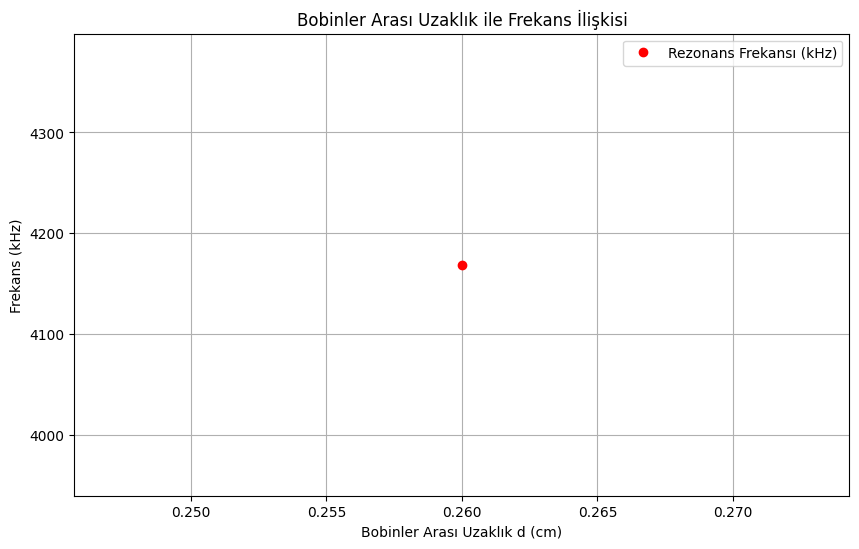

In [5]:
# Hesaplamalar
L = calculate_inductance(radius, n_turns)
M = calculate_mutual_inductance(radius, d)
f_res = calculate_resonant_frequency(L, M, C)
B1 = calculate_magnetic_field(radius, I, n_turns)  # Bobin 1'in oluşturduğu manyetik alan
B_mutual = calculate_mutual_magnetic_field(I, I, n_turns, n_turns, d)  # Bobinler arasındaki karşılıklı manyetik alan

# Frekans ve uzaklık grafiği
plt.figure(figsize=(10, 6))
plt.plot([d * 100], [f_res / 1e3], 'ro', label="Rezonans Frekansı (kHz)")
plt.xlabel("Bobinler Arası Uzaklık d (cm)")
plt.ylabel("Frekans (kHz)")
plt.title("Bobinler Arası Uzaklık ile Frekans İlişkisi")
plt.legend()
plt.grid()
plt.show()

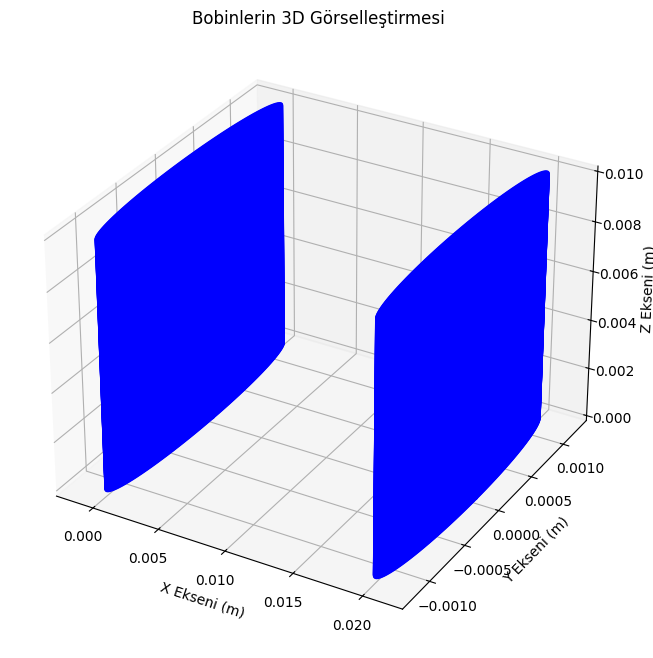

Bobinler Arası Uzaklık d = 0.26 cm için rezonans frekansı: 4168.61 kHz
Bobin 1'in merkezindeki manyetik alan: 2.62e-01 Tesla
Bobinler Arasındaki Karşılıklı Manyetik Alan: 1.92e+01 Tesla


In [6]:
# Bobinlerin 3D Görselleştirmesi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

def plot_coil(ax, center, radius, n_turns):
    """Bir bobinin 3D görselleştirmesini çiz."""
    theta = np.linspace(0, 2 * np.pi, 100)
    z = np.linspace(0, 0.01, n_turns)
    for zi in z:
        x = center[0] + radius * np.cos(theta)
        y = center[1] + radius * np.sin(theta)
        ax.plot(x, y, zi + center[2], color='b')

# Bobin 1 ve Bobin 2'nin çizimi
plot_coil(ax, [0, 0, 0], radius, n_turns)
plot_coil(ax, [0.02, 0, 0], radius, n_turns)  

ax.set_title("Bobinlerin 3D Görselleştirmesi")
ax.set_xlabel("X Ekseni (m)")
ax.set_ylabel("Y Ekseni (m)")
ax.set_zlabel("Z Ekseni (m)")
plt.show()

# Sonuçları yazdırma
print(f"Bobinler Arası Uzaklık d = 0.26 cm için rezonans frekansı: {f_res / 1e3:.2f} kHz")
print(f"Bobin 1'in merkezindeki manyetik alan: {B1:.2e} Tesla")
print(f"Bobinler Arasındaki Karşılıklı Manyetik Alan: {B_mutual:.2e} Tesla")

Resonant Frequency: 75520.35 Hz
Magnetic Field at Coil Center: 1.26e-03 T
Nanoparticle Magnetic Moment: 4.17e-24 A*m^2
Magnetic Torque on Nanoparticle: 5.24e-27 N*m


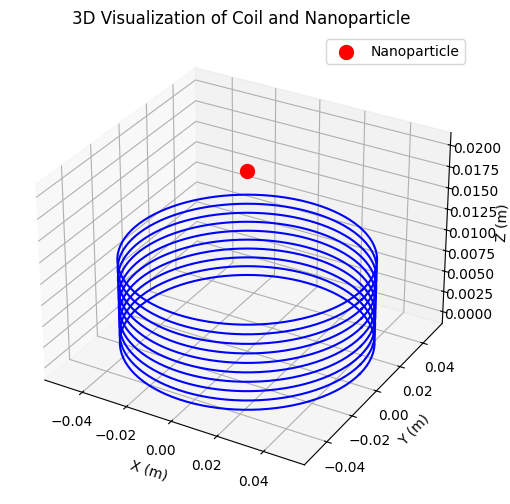

In [ ]:


# Constants
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability (H/m)
n_turns = 100             # Number of turns in the coil
I = 1.0                   # Current through the coil (A)
radius = 0.05             # Radius of the coil (m)
C = 1e-9                  # Capacitance (F)
frequency_range = np.linspace(1e3, 1e6, 1000)  # Frequency range (Hz)

# Nanoparticle parameters
nanoparticle_radius = 5e-9  # Nanoparticle radius (m)
magnetic_susceptibility = 1e-5  # Magnetic susceptibility (dimensionless)
nanoparticle_volume = (4 / 3) * np.pi * nanoparticle_radius**3
magnetic_moment = magnetic_susceptibility * nanoparticle_volume / mu_0  # Magnetic moment (A*m^2)

# Coil inductance calculation
def calculate_inductance(radius, n_turns):
    return mu_0 * n_turns**2 * np.pi * radius**2 / radius

# Mutual inductance calculation
def calculate_mutual_inductance(radius, d):
    return mu_0 * n_turns**2 * np.pi * radius**2 / (2 * d)

# Resonant frequency calculation
def calculate_resonant_frequency(L, M, C):
    return 1 / (2 * np.pi * np.sqrt((L + M) * C))

# Magnetic field calculation
def calculate_magnetic_field(radius, I, n_turns):
    return (mu_0 * n_turns * I) / (2 * radius)

# Magnetic torque on the nanoparticle
def calculate_magnetic_torque(magnetic_moment, magnetic_field):
    return magnetic_moment * magnetic_field

# Coil parameters
L = calculate_inductance(radius, n_turns)
M = calculate_mutual_inductance(radius, 0.02)  # Distance between coils is 0.02 m

# Resonant frequency
resonant_frequency = calculate_resonant_frequency(L, M, C)

# Magnetic field at the center of the coil
magnetic_field = calculate_magnetic_field(radius, I, n_turns)

# Magnetic torque on the nanoparticle
torque = calculate_magnetic_torque(magnetic_moment, magnetic_field)

# Results
print(f"Resonant Frequency: {resonant_frequency:.2f} Hz")
print(f"Magnetic Field at Coil Center: {magnetic_field:.2e} T")
print(f"Nanoparticle Magnetic Moment: {magnetic_moment:.2e} A*m^2")
print(f"Magnetic Torque on Nanoparticle: {torque:.2e} N*m")

# Visualization
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

def plot_coil(ax, radius, n_turns, offset):
    theta = np.linspace(0, 2 * np.pi, 100)
    z = np.linspace(0, 0.01, n_turns)
    for i in range(n_turns):
        x = radius * np.cos(theta)
        y = radius * np.sin(theta)
        ax.plot(x, y, z[i] + offset, color='b')

# Plot coil 1
plot_coil(ax, radius, 10, 0)

# Plot nanoparticle
ax.scatter(0, 0, 0.02, color='r', s=100, label='Nanoparticle')

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.legend()
plt.title("3D Visualization of Coil and Nanoparticle")
plt.show()

Resonant Frequency: 101321.18 Hz
Magnetic Field at Coil 1 Center: 1.26e-03 T
Mutual Inductance Between Coils: 4.93e-04 H


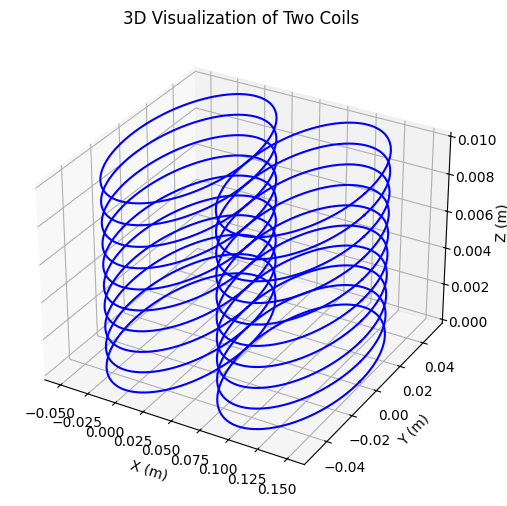

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability (H/m)
n_turns = 100             # Number of turns in each coil
I = 1.0                   # Current through the coils (A)
radius = 0.05             # Radius of the coils (m)
C = 1e-9                  # Capacitance (F)
d = 0.1                   # Distance between the centers of the two coils (m)

# Coil inductance calculation
def calculate_inductance(radius, n_turns):
    return mu_0 * n_turns**2 * np.pi * radius**2 / radius

# Mutual inductance calculation
def calculate_mutual_inductance(radius, d):
    return mu_0 * n_turns**2 * np.pi * radius**2 / (2 * d)

# Resonant frequency calculation
def calculate_resonant_frequency(L, M, C):
    return 1 / (2 * np.pi * np.sqrt((L + M) * C))

# Magnetic field calculation
def calculate_magnetic_field(radius, I, n_turns):
    return (mu_0 * n_turns * I) / (2 * radius)

# Coil parameters
L = calculate_inductance(radius, n_turns)
M = calculate_mutual_inductance(radius, d)  # Distance between coils

# Resonant frequency
resonant_frequency = calculate_resonant_frequency(L, M, C)

# Magnetic field at the center of the first coil
magnetic_field_coil1 = calculate_magnetic_field(radius, I, n_turns)

# Results
print(f"Resonant Frequency: {resonant_frequency:.2f} Hz")
print(f"Magnetic Field at Coil 1 Center: {magnetic_field_coil1:.2e} T")
print(f"Mutual Inductance Between Coils: {M:.2e} H")

# Visualization
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

def plot_coil(ax, center, radius, n_turns):
    theta = np.linspace(0, 2 * np.pi, 100)
    z = np.linspace(0, 0.01, n_turns)
    for zi in z:
        x = center[0] + radius * np.cos(theta)
        y = center[1] + radius * np.sin(theta)
        ax.plot(x, y, zi + center[2], color='b')

# Plot coil 1
plot_coil(ax, [0, 0, 0], radius, 10)

# Plot coil 2
plot_coil(ax, [d, 0, 0], radius, 10)

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
plt.title("3D Visualization of Two Coils")
plt.show()

Resonant Frequency: 101321.18 Hz
Magnetic Field at Coil 1 Center: 1.26e-03 T
Mutual Inductance Between Coils: 4.93e-04 H


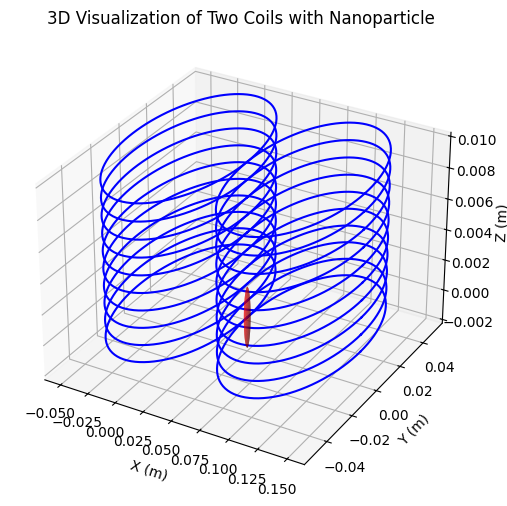

In [ ]:
# Constants
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability (H/m)
n_turns = 100             # Number of turns in each coil
I = 1.0                   # Current through the coils (A)
radius = 0.05             # Radius of the coils (m)
C = 1e-9                  # Capacitance (F)
d = 0.1                   # Distance between the centers of the two coils (m)
nanoparticle_radius = 5e-9  # Radius of the nanoparticle (m)

# Coil inductance calculation
def calculate_inductance(radius, n_turns):
    return mu_0 * n_turns**2 * np.pi * radius**2 / radius

# Mutual inductance calculation
def calculate_mutual_inductance(radius, d):
    return mu_0 * n_turns**2 * np.pi * radius**2 / (2 * d)

# Resonant frequency calculation
def calculate_resonant_frequency(L, M, C):
    return 1 / (2 * np.pi * np.sqrt((L + M) * C))

# Magnetic field calculation
def calculate_magnetic_field(radius, I, n_turns):
    return (mu_0 * n_turns * I) / (2 * radius)

# Coil parameters
L = calculate_inductance(radius, n_turns)
M = calculate_mutual_inductance(radius, d)  # Distance between coils

# Resonant frequency
resonant_frequency = calculate_resonant_frequency(L, M, C)

# Magnetic field at the center of the first coil
magnetic_field_coil1 = calculate_magnetic_field(radius, I, n_turns)

print(f"Resonant Frequency: {resonant_frequency:.2f} Hz")
print(f"Magnetic Field at Coil 1 Center: {magnetic_field_coil1:.2e} T")
print(f"Mutual Inductance Between Coils: {M:.2e} H")

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

def plot_coil(ax, center, radius, n_turns):
    theta = np.linspace(0, 2 * np.pi, 100)
    z = np.linspace(0, 0.01, n_turns)
    for zi in z:
        x = center[0] + radius * np.cos(theta)
        y = center[1] + radius * np.sin(theta)
        ax.plot(x, y, zi + center[2], color='b')

#coil 1
plot_coil(ax, [0, 0, 0], radius, 10)

#coil 2
plot_coil(ax, [d, 0, 0], radius, 10)

# Add nanoparticle
def plot_nanoparticle(ax, center, radius):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='r', alpha=0.6)

# Nanoparticle position (center between the coils)
nanoparticle_position = [d / 2, 0, 0]

visual_nanoparticle_radius = 0.002 
# plot_nanoparticle(ax, nanoparticle_position, nanoparticle_radius)

plot_nanoparticle(ax, nanoparticle_position, visual_nanoparticle_radius)

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
plt.title("3D Visualization of Two Coils with Nanoparticle")
plt.show()


In [11]:
# Compute magnetic field at a given point
def magnetic_field(x, y, z, coil_center, radius, n_turns, I):
    r = np.sqrt((x - coil_center[0])**2 + (y - coil_center[1])**2 + (z - coil_center[2])**2)
    if r == 0:
        return np.array([0, 0, 0])
    B_magnitude = (mu_0 * n_turns * I * radius**2) / (2 * (r**3))
    return B_magnitude * np.array([x - coil_center[0], y - coil_center[1], z - coil_center[2]])

# Compute magnetic field gradient numerically
def magnetic_field_gradient(pos, coil_center, radius, n_turns, I, delta=1e-6):
    grad = np.zeros(3)
    for i in range(3):
        pos_forward = pos.copy()
        pos_forward[i] += delta
        pos_backward = pos.copy()
        pos_backward[i] -= delta
        B_forward = magnetic_field(*pos_forward, coil_center, radius, n_turns, I)
        B_backward = magnetic_field(*pos_backward, coil_center, radius, n_turns, I)
        grad[i] = (np.linalg.norm(B_forward) - np.linalg.norm(B_backward)) / (2 * delta)
    return grad

# Position of the nanoparticle
nanoparticle_position = [d / 2, 0, 0]

# Magnetic moment of the nanoparticle (aligned along z-axis)
magnetic_moment = np.array([0, 0, 1e-18])  # Example magnetic moment in A·m²

# Calculate the net magnetic field and gradient
B_net = magnetic_field(*nanoparticle_position, [0, 0, 0], radius, n_turns, I) + \
        magnetic_field(*nanoparticle_position, [d, 0, 0], radius, n_turns, I)

grad_B = magnetic_field_gradient(nanoparticle_position, [0, 0, 0], radius, n_turns, I) + \
         magnetic_field_gradient(nanoparticle_position, [d, 0, 0], radius, n_turns, I)

# Calculate the force
force = np.dot(magnetic_moment, grad_B)
print(f"Magnetic Force on Nanoparticle: {force:.2e} N")


Magnetic Force on Nanoparticle: 0.00e+00 N


****************************************** 17.03.2025 Tarihli çalışmalar ****************************************

Bobinin manyetik alanı: 2.51e-03 T
İki bobin arasındaki kuvvet: 1.00e-06 N


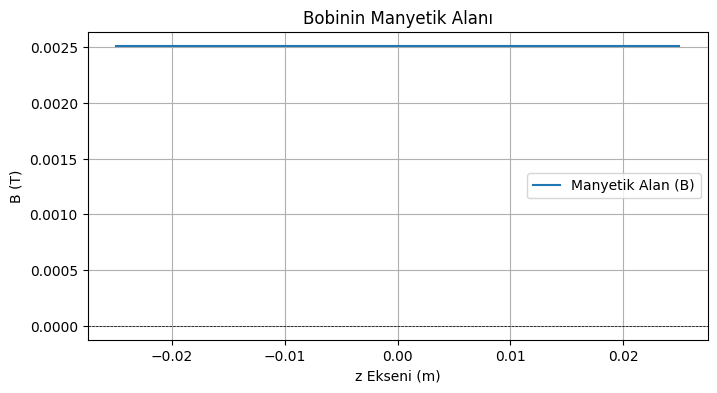

In [ ]:
def calculate_magnetic_field(mu_0, N, I, L):
    """
    Manyetik alanı hesaplar.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - N: Bobin sarmal sayısı
    - I: Akım (A)
    - L: Bobin uzunluğu (m)
    
    Dönüş:
    - Manyetik alan (T)
    """
    return (mu_0 * N * I) / L

def calculate_force_between_coils(mu_0, I1, I2, L, d):
    """
    İki bobin arasındaki manyetik kuvveti hesaplar.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - I1, I2: İki bobin üzerinden geçen akımlar (A)
    - L: Bobin uzunluğu (m)
    - d: Bobinler arası mesafe (m)
    
    Dönüş:
    - Kuvvet (N)
    """
    return (mu_0 * I1 * I2 * L) / (2 * np.pi * d)

def simulate_bobin_field(r, L, N, I):
    """
    Bobinin çevresindeki manyetik alanı simüle eder.
    Parametreler:
    - r: Bobin yarıçapı (m)
    - L: Bobin uzunluğu (m)
    - N: Bobin sarmal sayısı
    - I: Akım (A)
    
    Görselleştirme döndürür.
    """
    z = np.linspace(-L/2, L/2, 500)  # Bobin boyunca z ekseni boyunca noktalar
    B = (mu_0 * N * I) / L  # Sabit manyetik alan
    plt.figure(figsize=(8, 4))
    plt.plot(z, B * np.ones_like(z), label='Manyetik Alan (B)')
    plt.title('Bobinin Manyetik Alanı')
    plt.xlabel('z Ekseni (m)')
    plt.ylabel('B (T)')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.legend()
    plt.grid()
    plt.show()

# Parametreler
mu_0 = 4 * np.pi * 1e-7  # Vakum geçirgenliği (T·m/A)
r = 0.005  # Bobin yarıçapı (m)
L = 0.05  # Bobin uzunluğu (m)
N = 100  # Bobin sarmal sayısı
I = 1.0  # Bobinden geçen akım (A)
d = 0.01  # Bobinler arası mesafe (örnek)

# Manyetik alanı hesapla
B = calculate_magnetic_field(mu_0, N, I, L)
print(f"Bobinin manyetik alanı: {B:.2e} T")

# İki bobin arasındaki kuvveti hesapla
I1, I2 = I, I  # İki bobin üzerinden geçen akımlar
F = calculate_force_between_coils(mu_0, I1, I2, L, d)
print(f"İki bobin arasındaki kuvvet: {F:.2e} N")

# Manyetik alan simülasyonu
simulate_bobin_field(r, L, N, I)


Bobin 1'in manyetik alanı: 2.51e-03 T
Bobin 2'nin manyetik alanı (ters yön): -2.51e-03 T
İki bobin arasındaki itici kuvvet: 1.00e-07 N


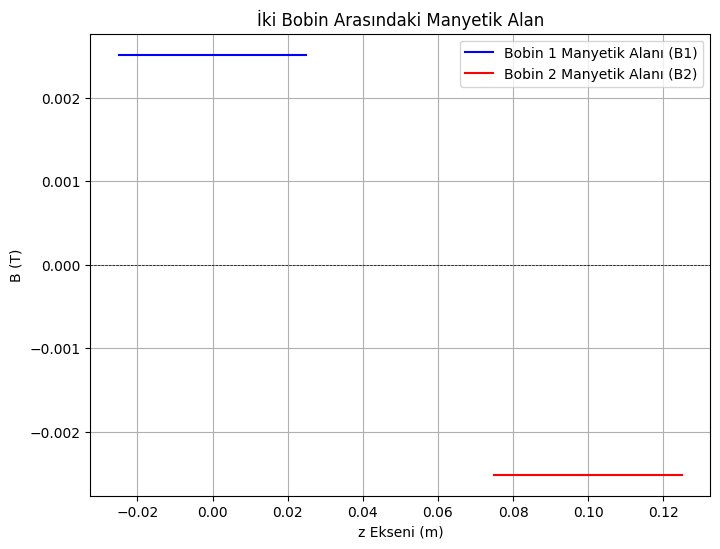

In [ ]:

def calculate_magnetic_field(mu_0, N, I, L):
    """
    Manyetik alanı hesaplar.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - N: Bobin sarmal sayısı
    - I: Akım (A)
    - L: Bobin uzunluğu (m)
    
    Dönüş:
    - Manyetik alan (T)
    """
    return (mu_0 * N * I) / L

def calculate_force_between_coils(mu_0, I1, I2, L, d):
    """
    İki bobin arasındaki manyetik kuvveti hesaplar.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - I1, I2: İki bobin üzerinden geçen akımlar (A)
    - L: Bobin uzunluğu (m)
    - d: Bobinler arası mesafe (m)
    
    Dönüş:
    - Kuvvet (N)
    """
    return (mu_0 * I1 * I2 * L) / (2 * np.pi * d)

def simulate_two_coils_field(r, L, N, I1, I2, d):
    """
    İki bobinin çevresindeki manyetik alanı simüle eder.
    Parametreler:
    - r: Bobin yarıçapı (m)
    - L: Bobin uzunluğu (m)
    - N: Bobin sarmal sayısı
    - I1, I2: Akımlar (A)
    - d: İki bobin arası mesafe (m)
    
    Görselleştirme döndürür.
    """
    z1 = np.linspace(-L/2, L/2, 500)  # İlk bobin boyunca z ekseni noktaları
    z2 = np.linspace(-L/2 + d, L/2 + d, 500)  # İkinci bobin boyunca z ekseni noktaları
    B1 = (mu_0 * N * I1) / L  # İlk bobinin manyetik alanı
    B2 = -(mu_0 * N * I2) / L  # İkinci bobinin manyetik alanı (ters akım yönü)

    plt.figure(figsize=(8, 6))
    plt.plot(z1, B1 * np.ones_like(z1), label='Bobin 1 Manyetik Alanı (B1)', color='blue')
    plt.plot(z2, B2 * np.ones_like(z2), label='Bobin 2 Manyetik Alanı (B2)', color='red')
    plt.title('İki Bobin Arasındaki Manyetik Alan')
    plt.xlabel('z Ekseni (m)')
    plt.ylabel('B (T)')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.legend()
    plt.grid()
    plt.show()

# Parametreler
mu_0 = 4 * np.pi * 1e-7  # Vakum geçirgenliği (T·m/A)
r = 0.005  # Bobin yarıçapı (m)
L = 0.05  # Bobin uzunluğu (m)
N = 100  # Bobin sarmal sayısı
I1 = 1.0  # İlk bobinden geçen akım (A)
I2 = 1.0  # İkinci bobinden geçen akım (A)
d = 0.1  # İki bobin arası mesafe (m)

# Manyetik alanları hesapla
B1 = calculate_magnetic_field(mu_0, N, I1, L)
B2 = calculate_magnetic_field(mu_0, N, I2, L)
print(f"Bobin 1'in manyetik alanı: {B1:.2e} T")
print(f"Bobin 2'nin manyetik alanı (ters yön): {-B2:.2e} T")

# İki bobin arasındaki kuvveti hesapla
F = calculate_force_between_coils(mu_0, I1, I2, L, d)
print(f"İki bobin arasındaki itici kuvvet: {F:.2e} N")

# İki bobinin manyetik alan simülasyonu
simulate_two_coils_field(r, L, N, I1, I2, d)


Manyetik alanın sıfırlandığı nokta: 0.0000 m


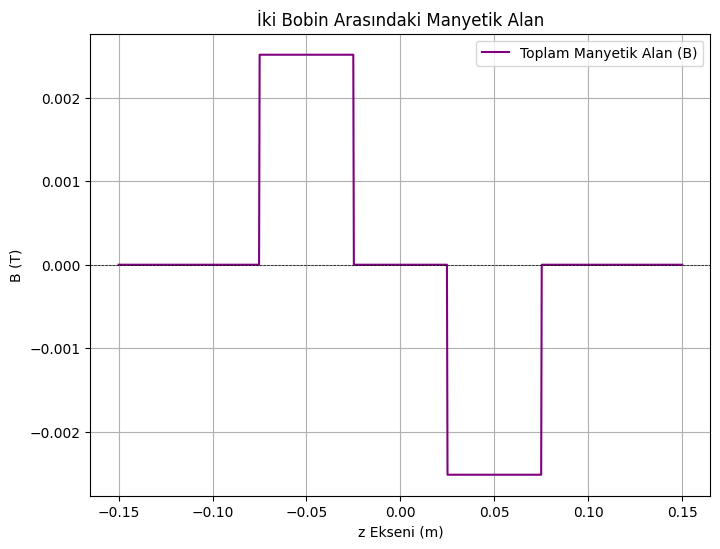

In [ ]:
from scipy.optimize import fsolve

def calculate_magnetic_field(mu_0, N, I, L, z, z0):
    """
    Bir bobin tarafından belirli bir noktada oluşturulan manyetik alanı hesaplar.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - N: Bobin sarmal sayısı
    - I: Akım (A)
    - L: Bobin uzunluğu (m)
    - z: Hesaplama yapılacak noktanın z koordinatı (m)
    - z0: Bobinin merkezi z koordinatı (m)

    Dönüş:
    - Manyetik alan (T)
    """
    return (mu_0 * N * I) / L * np.heaviside(L / 2 - np.abs(z - z0), 1)

def calculate_force_between_coils(mu_0, I1, I2, L, d):
    """
    İki bobin arasındaki manyetik kuvveti hesaplar.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - I1, I2: İki bobin üzerinden geçen akımlar (A)
    - L: Bobin uzunluğu (m)
    - d: Bobinler arası mesafe (m)

    Dönüş:
    - Kuvvet (N)
    """
    return (mu_0 * I1 * I2 * L) / (2 * np.pi * d)

def find_zero_field_point(mu_0, N, I1, I2, L, d):
    """
    İki bobin arasındaki toplam manyetik alanın sıfırlandığı noktayı bulur.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - N: Bobin sarmal sayısı
    - I1, I2: Akımlar (A)
    - L: Bobin uzunluğu (m)
    - d: İki bobin arası mesafe (m)

    Dönüş:
    - Sıfır manyetik alan noktası (m)
    """
    def total_magnetic_field(z):
        B1 = calculate_magnetic_field(mu_0, N, I1, L, z, -d / 2)
        B2 = calculate_magnetic_field(mu_0, N, -I2, L, z, d / 2)
        return B1 + B2

    # İlk tahmin: bobinlerin ortası
    initial_guess = 0.0
    zero_field_point = fsolve(total_magnetic_field, initial_guess)
    return zero_field_point[0]

def simulate_two_coils_field(mu_0, N, I1, I2, L, d):
    """
    İki bobinin çevresindeki manyetik alanı simüle eder.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - N: Bobin sarmal sayısı
    - I1, I2: Akımlar (A)
    - L: Bobin uzunluğu (m)
    - d: İki bobin arası mesafe (m)

    Görselleştirme döndürür.
    """
    z = np.linspace(-L - d, L + d, 1000)  # z ekseni boyunca noktalar
    B_total = np.array([calculate_magnetic_field(mu_0, N, I1, L, zi, -d / 2) +
                        calculate_magnetic_field(mu_0, N, -I2, L, zi, d / 2) for zi in z])

    plt.figure(figsize=(8, 6))
    plt.plot(z, B_total, label='Toplam Manyetik Alan (B)', color='purple')
    plt.title('İki Bobin Arasındaki Manyetik Alan')
    plt.xlabel('z Ekseni (m)')
    plt.ylabel('B (T)')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.legend()
    plt.grid()
    plt.show()

# Parametreler
mu_0 = 4 * np.pi * 1e-7  # Vakum geçirgenliği (T·m/A)
r = 0.005  # Bobin yarıçapı (m)
L = 0.05  # Bobin uzunluğu (m)
N = 100  # Bobin sarmal sayısı
I1 = 1.0  # İlk bobinden geçen akım (A)
I2 = 1.0  # İkinci bobinden geçen akım (A)
d = 0.1  # İki bobin arası mesafe (m)

# Manyetik alanın sıfırlandığı noktayı bul
zero_field_point = find_zero_field_point(mu_0, N, I1, I2, L, d)
print(f"Manyetik alanın sıfırlandığı nokta: {zero_field_point:.4f} m")

# İki bobinin manyetik alan simülasyonu
simulate_two_coils_field(mu_0, N, I1, I2, L, d)


Manyetik alanın sıfırlandığı nokta: 0.0000 m


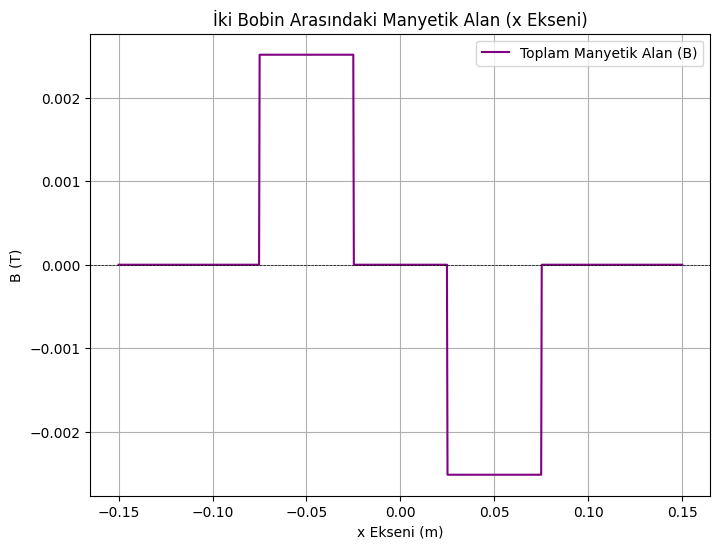

In [ ]:

def calculate_magnetic_field(mu_0, N, I, L, x, x0):
    """
    Bir bobin tarafından belirli bir noktada oluşturulan manyetik alanı hesaplar.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - N: Bobin sarmal sayısı
    - I: Akım (A)
    - L: Bobin uzunluğu (m)
    - x: Hesaplama yapılacak noktanın x koordinatı (m)
    - x0: Bobinin merkezi x koordinatı (m)

    Dönüş:
    - Manyetik alan (T)
    """
    return (mu_0 * N * I) / L * np.heaviside(L / 2 - np.abs(x - x0), 1)

def calculate_force_between_coils(mu_0, I1, I2, L, d):
    """
    İki bobin arasındaki manyetik kuvveti hesaplar.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - I1, I2: İki bobin üzerinden geçen akımlar (A)
    - L: Bobin uzunluğu (m)
    - d: İki bobin arası mesafe (m)

    Dönüş:
    - Kuvvet (N)
    """
    return (mu_0 * I1 * I2 * L) / (2 * np.pi * d)

def find_zero_field_point(mu_0, N, I1, I2, L, d):
    """
    İki bobin arasındaki toplam manyetik alanın sıfırlandığı noktayı bulur.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - N: Bobin sarmal sayısı
    - I1, I2: Akımlar (A)
    - L: Bobin uzunluğu (m)
    - d: İki bobin arası mesafe (m)

    Dönüş:
    - Sıfır manyetik alan noktası (m)
    """
    def total_magnetic_field(x):
        B1 = calculate_magnetic_field(mu_0, N, I1, L, x, -d / 2)
        B2 = calculate_magnetic_field(mu_0, N, -I2, L, x, d / 2)
        return B1 + B2

    # İlk tahmin: bobinlerin ortası
    initial_guess = 0.0
    zero_field_point = fsolve(total_magnetic_field, initial_guess)
    return zero_field_point[0]

def simulate_two_coils_field(mu_0, N, I1, I2, L, d):
    """
    İki bobinin çevresindeki manyetik alanı simüle eder.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - N: Bobin sarmal sayısı
    - I1, I2: Akımlar (A)
    - L: Bobin uzunluğu (m)
    - d: İki bobin arası mesafe (m)

    Görselleştirme döndürür.
    """
    x = np.linspace(-L - d, L + d, 1000)  # x ekseni boyunca noktalar
    B_total = np.array([calculate_magnetic_field(mu_0, N, I1, L, xi, -d / 2) +
                        calculate_magnetic_field(mu_0, N, -I2, L, xi, d / 2) for xi in x])

    plt.figure(figsize=(8, 6))
    plt.plot(x, B_total, label='Toplam Manyetik Alan (B)', color='purple')
    plt.title('İki Bobin Arasındaki Manyetik Alan (x Ekseni)')
    plt.xlabel('x Ekseni (m)')
    plt.ylabel('B (T)')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.legend()
    plt.grid()
    plt.show()

mu_0 = 4 * np.pi * 1e-7  # Vakum geçirgenliği (T·m/A)
r = 0.005  # Bobin yarıçapı (m)
L = 0.05  # Bobin uzunluğu (m)
N = 100  # Bobin sarmal sayısı
I1 = 1.0  # İlk bobinden geçen akım (A)
I2 = 1.0  # İkinci bobinden geçen akım (A)
d = 0.1  # İki bobin arası mesafe (m)

# Manyetik alanın sıfırlandığı nokta
zero_field_point = find_zero_field_point(mu_0, N, I1, I2, L, d)
print(f"Manyetik alanın sıfırlandığı nokta: {zero_field_point:.4f} m")

simulate_two_coils_field(mu_0, N, I1, I2, L, d)


Manyetik alanın sıfırlandığı nokta: 0.0000 m
Manyetik alanın sıfır olduğu aralıklar:
-0.1500 m ile -0.0752 m arası
-0.0248 m ile 0.0248 m arası
0.0752 m ile 0.1500 m arası


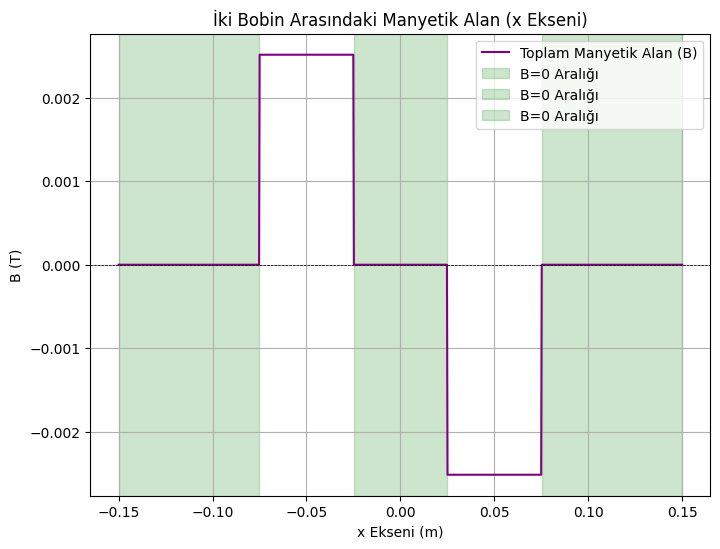

In [ ]:
def calculate_magnetic_field(mu_0, N, I, L, x, x0):
    """
    Bir bobin tarafından belirli bir noktada oluşturulan manyetik alanı hesaplar.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - N: Bobin sarmal sayısı
    - I: Akım (A)
    - L: Bobin uzunluğu (m)
    - x: Hesaplama yapılacak noktanın x koordinatı (m)
    - x0: Bobinin merkezi x koordinatı (m)

    Dönüş:
    - Manyetik alan (T)
    """
    return (mu_0 * N * I) / L * np.heaviside(L / 2 - np.abs(x - x0), 1)

def calculate_force_between_coils(mu_0, I1, I2, L, d):
    """
    İki bobin arasındaki manyetik kuvveti hesaplar.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - I1, I2: İki bobin üzerinden geçen akımlar (A)
    - L: Bobin uzunluğu (m)
    - d: İki bobin arası mesafe (m)

    Dönüş:
    - Kuvvet (N)
    """
    return (mu_0 * I1 * I2 * L) / (2 * np.pi * d)

def find_zero_field_point(mu_0, N, I1, I2, L, d):
    """
    İki bobin arasındaki toplam manyetik alanın sıfırlandığı noktayı bulur.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - N: Bobin sarmal sayısı
    - I1, I2: Akımlar (A)
    - L: Bobin uzunluğu (m)
    - d: İki bobin arası mesafe (m)

    Dönüş:
    - Sıfır manyetik alan noktası (m)
    """
    def total_magnetic_field(x):
        B1 = calculate_magnetic_field(mu_0, N, I1, L, x, -d / 2)
        B2 = calculate_magnetic_field(mu_0, N, -I2, L, x, d / 2)
        return B1 + B2

    # İlk tahmin: bobinlerin ortası
    initial_guess = 0.0
    zero_field_point = fsolve(total_magnetic_field, initial_guess)
    return zero_field_point[0]

def simulate_two_coils_field(mu_0, N, I1, I2, L, d):
    """
    İki bobinin çevresindeki manyetik alanı simüle eder.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - N: Bobin sarmal sayısı
    - I1, I2: Akımlar (A)
    - L: Bobin uzunluğu (m)
    - d: İki bobin arası mesafe (m)

    Görselleştirme döndürür.
    """
    x = np.linspace(-L - d, L + d, 1000)  # x ekseni boyunca noktalar
    B_total = np.array([calculate_magnetic_field(mu_0, N, I1, L, xi, -d / 2) +
                        calculate_magnetic_field(mu_0, N, -I2, L, xi, d / 2) for xi in x])

    # Sıfır noktalarını bulmak için indeksler
    zero_indices = np.where(np.isclose(B_total, 0, atol=1e-6))[0]
    zero_ranges = []
    if len(zero_indices) > 0:
        current_range = [x[zero_indices[0]]]
        for i in range(1, len(zero_indices)):
            if zero_indices[i] != zero_indices[i - 1] + 1:
                current_range.append(x[zero_indices[i - 1]])
                zero_ranges.append(current_range)
                current_range = [x[zero_indices[i]]]
        current_range.append(x[zero_indices[-1]])
        zero_ranges.append(current_range)

    print("Manyetik alanın sıfır olduğu aralıklar:")
    for r in zero_ranges:
        print(f"{r[0]:.4f} m ile {r[1]:.4f} m arası")

    plt.figure(figsize=(8, 6))
    plt.plot(x, B_total, label='Toplam Manyetik Alan (B)', color='purple')
    plt.title('İki Bobin Arasındaki Manyetik Alan (x Ekseni)')
    plt.xlabel('x Ekseni (m)')
    plt.ylabel('B (T)')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

    # Sıfır noktalarını işaretle
    for r in zero_ranges:
        plt.axvspan(r[0], r[1], color='green', alpha=0.2, label='B=0 Aralığı')

    plt.legend()
    plt.grid()
    plt.show()

mu_0 = 4 * np.pi * 1e-7  # Vakum geçirgenliği (T·m/A)
r = 0.005  # Bobin yarıçapı (m)
L = 0.05  # Bobin uzunluğu (m)
N = 100  # Bobin sarmal sayısı
I1 = 1.0  # İlk bobinden geçen akım (A)
I2 = 1.0  # İkinci bobinden geçen akım (A)
d = 0.1  # İki bobin arası mesafe (m)

zero_field_point = find_zero_field_point(mu_0, N, I1, I2, L, d)
print(f"Manyetik alanın sıfırlandığı nokta: {zero_field_point:.4f} m")

simulate_two_coils_field(mu_0, N, I1, I2, L, d)


Manyetik alanın sıfırlandığı nokta: 0.0000 m
Manyetik alanın sıfır olduğu aralıklar:
-0.1500 m ile -0.1500 m arası
0.1500 m ile 0.1500 m arası


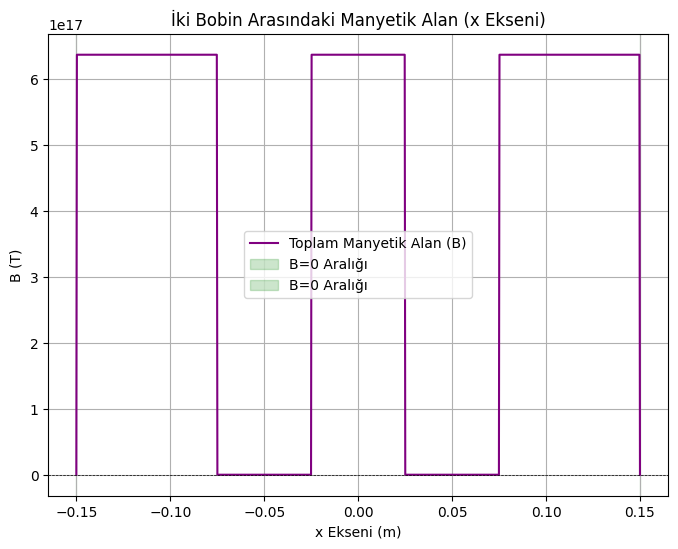

In [ ]:

def calculate_magnetic_field(mu_0, N, I, L, x, x0):
    """
    Bir bobin tarafından belirli bir noktada oluşturulan manyetik alanı hesaplar.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - N: Bobin sarmal sayısı
    - I: Akım (A)
    - L: Bobin uzunluğu (m)
    - x: Hesaplama yapılacak noktanın x koordinatı (m)
    - x0: Bobinin merkezi x koordinatı (m)

    Dönüş:
    - Manyetik alan (T)
    """
    return (mu_0 * N * I) / L * np.heaviside(L / 2 - np.abs(x - x0), 1)

def calculate_force_between_coils(mu_0, I1, I2, L, d):
    """
    İki bobin arasındaki manyetik kuvveti hesaplar.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - I1, I2: İki bobin üzerinden geçen akımlar (A)
    - L: Bobin uzunluğu (m)
    - d: İki bobin arası mesafe (m)

    Dönüş:
    - Kuvvet (N)
    """
    return (mu_0 * I1 * I2 * L) / (2 * np.pi * d)

def find_zero_field_point(mu_0, N, I1, I2, L, d):
    """
    İki bobin arasındaki toplam manyetik alanın sıfırlandığı noktayı bulur.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - N: Bobin sarmal sayısı
    - I1, I2: Akımlar (A)
    - L: Bobin uzunluğu (m)
    - d: İki bobin arası mesafe (m)

    Dönüş:
    - Sıfır manyetik alan noktası (m)
    """
    def total_magnetic_field(x):
        B1 = calculate_magnetic_field(mu_0, N, I1, L, x, -d / 2)
        B2 = calculate_magnetic_field(mu_0, N, -I2, L, x, d / 2)
        return B1 + B2

    # İlk tahmin: bobinlerin ortası
    initial_guess = 0.0
    zero_field_point = fsolve(total_magnetic_field, initial_guess)
    return zero_field_point[0]

def simulate_two_coils_field(mu_0, N, I1, I2, L, d, particles=[]):
    """
    İki bobinin çevresindeki manyetik alanı simüle eder.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - N: Bobin sarmal sayısı
    - I1, I2: Akımlar (A)
    - L: Bobin uzunluğu (m)
    - d: İki bobin arası mesafe (m)
    - particles: Nanoparçacık bilgileri (liste)

    Görselleştirme döndürür.
    """
    x = np.linspace(-L - d, L + d, 1000)  # x ekseni boyunca noktalar
    B_total = np.array([calculate_magnetic_field(mu_0, N, I1, L, xi, -d / 2) +
                        calculate_magnetic_field(mu_0, N, -I2, L, xi, d / 2) for xi in x])

    # Nanoparçacık etkilerini ekle
    for particle in particles:
        r, m, region = particle['radius'], particle['magnetization'], particle['region']
        region_indices = np.where((x >= region[0]) & (x <= region[1]))[0]
        for idx in region_indices:
            B_total[idx] += m / (4 * np.pi * r**3)  # Basit dipol etkisi

    zero_indices = np.where(np.isclose(B_total, 0, atol=1e-6))[0]
    zero_ranges = []
    if len(zero_indices) > 0:
        current_range = [x[zero_indices[0]]]
        for i in range(1, len(zero_indices)):
            if zero_indices[i] != zero_indices[i - 1] + 1:
                current_range.append(x[zero_indices[i - 1]])
                zero_ranges.append(current_range)
                current_range = [x[zero_indices[i]]]
        current_range.append(x[zero_indices[-1]])
        zero_ranges.append(current_range)

    print("Manyetik alanın sıfır olduğu aralıklar:")
    for r in zero_ranges:
        print(f"{r[0]:.4f} m ile {r[1]:.4f} m arası")

    plt.figure(figsize=(8, 6))
    plt.plot(x, B_total, label='Toplam Manyetik Alan (B)', color='purple')
    plt.title('İki Bobin Arasındaki Manyetik Alan (x Ekseni)')
    plt.xlabel('x Ekseni (m)')
    plt.ylabel('B (T)')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

    for r in zero_ranges:
        plt.axvspan(r[0], r[1], color='green', alpha=0.2, label='B=0 Aralığı')

    plt.legend()
    plt.grid()
    plt.show()

mu_0 = 4 * np.pi * 1e-7  # Vakum geçirgenliği (T·m/A)
r = 0.005  # Bobin yarıçapı (m)
L = 0.05  # Bobin uzunluğu (m)
N = 100  # Bobin sarmal sayısı
I1 = 1.0  # İlk bobinden geçen akım (A)
I2 = 1.0  # İkinci bobinden geçen akım (A)
d = 0.1  # İki bobin arası mesafe (m)

zero_field_point = find_zero_field_point(mu_0, N, I1, I2, L, d)
print(f"Manyetik alanın sıfırlandığı nokta: {zero_field_point:.4f} m")

# Nanoparçacık 
particles = [
    {'radius': 5e-9, 'magnetization': 1e-6, 'region': [-0.15, -0.0752]},
    {'radius': 5e-9, 'magnetization': 1e-6, 'region': [-0.0248, 0.0248]},
    {'radius': 5e-9, 'magnetization': 1e-6, 'region': [0.0752, 0.15]},
    {'radius': 60e-9, 'magnetization': 1e-6, 'region': [-0.15, -0.0752]},
    {'radius': 60e-9, 'magnetization': 1e-6, 'region': [-0.0248, 0.0248]},
    {'radius': 60e-9, 'magnetization': 1e-6, 'region': [0.0752, 0.15]}
]

simulate_two_coils_field(mu_0, N, I1, I2, L, d, particles=particles)


Manyetik alanın sıfırlandığı nokta: 0.0000 m
Manyetik alanın sıfır olduğu aralıklar:
-0.1500 m ile -0.1500 m arası
0.1500 m ile 0.1500 m arası


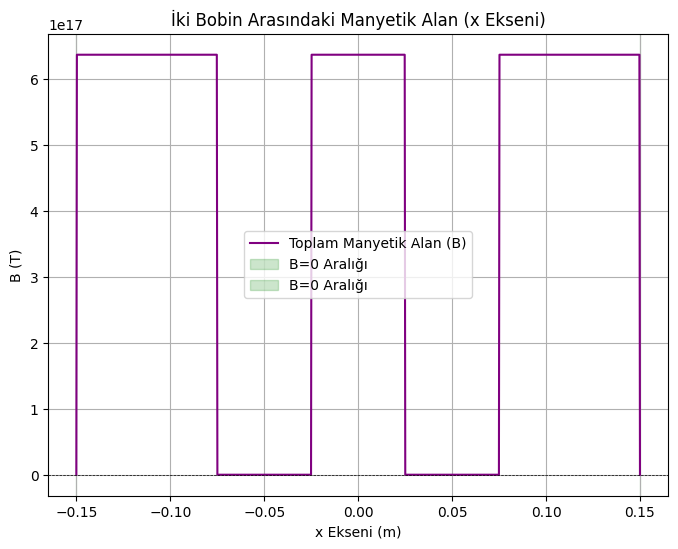

In [ ]:

def calculate_magnetic_field(mu_0, N, I, L, x, x0):
    """
    Bir bobin tarafından belirli bir noktada oluşturulan manyetik alanı hesaplar.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - N: Bobin sarmal sayısı
    - I: Akım (A)
    - L: Bobin uzunluğu (m)
    - x: Hesaplama yapılacak noktanın x koordinatı (m)
    - x0: Bobinin merkezi x koordinatı (m)

    Dönüş:
    - Manyetik alan (T)
    """
    return (mu_0 * N * I) / L * np.heaviside(L / 2 - np.abs(x - x0), 1)

def calculate_force_between_coils(mu_0, I1, I2, L, d):
    """
    İki bobin arasındaki manyetik kuvveti hesaplar.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - I1, I2: İki bobin üzerinden geçen akımlar (A)
    - L: Bobin uzunluğu (m)
    - d: İki bobin arası mesafe (m)

    Dönüş:
    - Kuvvet (N)
    """
    return (mu_0 * I1 * I2 * L) / (2 * np.pi * d)

def find_zero_field_point(mu_0, N, I1, I2, L, d):
    """
    İki bobin arasındaki toplam manyetik alanın sıfırlandığı noktayı bulur.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - N: Bobin sarmal sayısı
    - I1, I2: Akımlar (A)
    - L: Bobin uzunluğu (m)
    - d: İki bobin arası mesafe (m)

    Dönüş:
    - Sıfır manyetik alan noktası (m)
    """
    def total_magnetic_field(x):
        B1 = calculate_magnetic_field(mu_0, N, I1, L, x, -d / 2)
        B2 = calculate_magnetic_field(mu_0, N, -I2, L, x, d / 2)
        return B1 + B2

    # İlk tahmin: bobinlerin ortası
    initial_guess = 0.0
    zero_field_point = fsolve(total_magnetic_field, initial_guess)
    return zero_field_point[0]

def simulate_two_coils_field(mu_0, N, I1, I2, L, d, particles=[]):
    """
    İki bobinin çevresindeki manyetik alanı simüle eder.
    Parametreler:
    - mu_0: Vakum geçirgenliği (T·m/A)
    - N: Bobin sarmal sayısı
    - I1, I2: Akımlar (A)
    - L: Bobin uzunluğu (m)
    - d: İki bobin arası mesafe (m)
    - particles: Nanoparçacık bilgileri (liste)

    Görselleştirme döndürür.
    """
    x = np.linspace(-L - d, L + d, 1000)  # x ekseni boyunca noktalar
    B_total = np.array([calculate_magnetic_field(mu_0, N, I1, L, xi, -d / 2) +
                        calculate_magnetic_field(mu_0, N, -I2, L, xi, d / 2) for xi in x])

    # Nanoparçacık etkilerini ekle
    for particle in particles:
        r, m, region = particle['radius'], particle['magnetization'], particle['region']
        region_indices = np.where((x >= region[0]) & (x <= region[1]))[0]
        for idx in region_indices:
            B_total[idx] += m / (4 * np.pi * r**3)  # Basit dipol etkisi

    # Sıfır noktalarını bulmak için indeksler
    zero_indices = np.where(np.isclose(B_total, 0, atol=1e-6))[0]
    zero_ranges = []
    if len(zero_indices) > 0:
        current_range = [x[zero_indices[0]]]
        for i in range(1, len(zero_indices)):
            if zero_indices[i] != zero_indices[i - 1] + 1:
                current_range.append(x[zero_indices[i - 1]])
                zero_ranges.append(current_range)
                current_range = [x[zero_indices[i]]]
        current_range.append(x[zero_indices[-1]])
        zero_ranges.append(current_range)

    print("Manyetik alanın sıfır olduğu aralıklar:")
    for r in zero_ranges:
        print(f"{r[0]:.4f} m ile {r[1]:.4f} m arası")

    plt.figure(figsize=(8, 6))
    plt.plot(x, B_total, label='Toplam Manyetik Alan (B)', color='purple')
    plt.title('İki Bobin Arasındaki Manyetik Alan (x Ekseni)')
    plt.xlabel('x Ekseni (m)')
    plt.ylabel('B (T)')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

    # Sıfır noktalarını işaretle
    for r in zero_ranges:
        plt.axvspan(r[0], r[1], color='green', alpha=0.2, label='B=0 Aralığı')

    plt.legend()
    plt.grid()
    plt.show()

# Parametreler
mu_0 = 4 * np.pi * 1e-7  # Vakum geçirgenliği (T·m/A)
r = 0.005  # Bobin yarıçapı (m)
L = 0.05  # Bobin uzunluğu (m)
N = 100  # Bobin sarmal sayısı
I1 = 1.0  # İlk bobinden geçen akım (A)
I2 = 1.0  # İkinci bobinden geçen akım (A)
d = 0.1  # İki bobin arası mesafe (m)

# Manyetik alanın sıfırlandığı noktayı bul
zero_field_point = find_zero_field_point(mu_0, N, I1, I2, L, d)
print(f"Manyetik alanın sıfırlandığı nokta: {zero_field_point:.4f} m")

# Nanoparçacık tanımları
particles = [
    {'radius': 5e-9, 'magnetization': 1e-6, 'region': [-0.15, -0.0752]},
    {'radius': 5e-9, 'magnetization': 1e-6, 'region': [-0.0248, 0.0248]},
    {'radius': 5e-9, 'magnetization': 1e-6, 'region': [0.0752, 0.15]}
]

# İki bobinin manyetik alan simülasyonu
simulate_two_coils_field(mu_0, N, I1, I2, L, d, particles=particles)


In [ ]:
import scipy.optimize as opt

# Given parameters
mu_0 = 4 * np.pi * 1e-7  # Vacuum permeability (T m/A)
r = 0.005  # Coil radius (m)
L = 0.05   # Coil length (m)
N = 100    # Number of coil turns
I1 = 1.0   # Current through the first coil (A)
I2 = -1.0  # Current through the second coil (A), opposite direction

def magnetic_field(z, d):
    """
    Computes the magnetic field at position z due to two coils at z = ±d/2.
    Uses the Biot-Savart law approximation for a loop of current.
    """
    def field_at_point(z0, I):
        return (mu_0 * N * I * r**2) / (2 * (r**2 + (z - z0)**2)**(3/2))

    B1 = field_at_point(d/2, I1)  # Field from the first coil
    B2 = field_at_point(-d/2, I2)  # Field from the second coil
    return B1 + B2

def optimize_distance():
    """
    Finds the optimal distance between the coils by minimizing the field at z=0.
    """
    result = opt.minimize_scalar(lambda d: abs(magnetic_field(0, d)), bounds=(0.01, 0.2), method='bounded')
    return result.x

optimal_distance = optimize_distance()
print(f"Optimal coil separation distance: {optimal_distance:.5f} m")


Optimal coil separation distance: 0.20000 m


Optimum bobin mesafesi: 0.20000 m


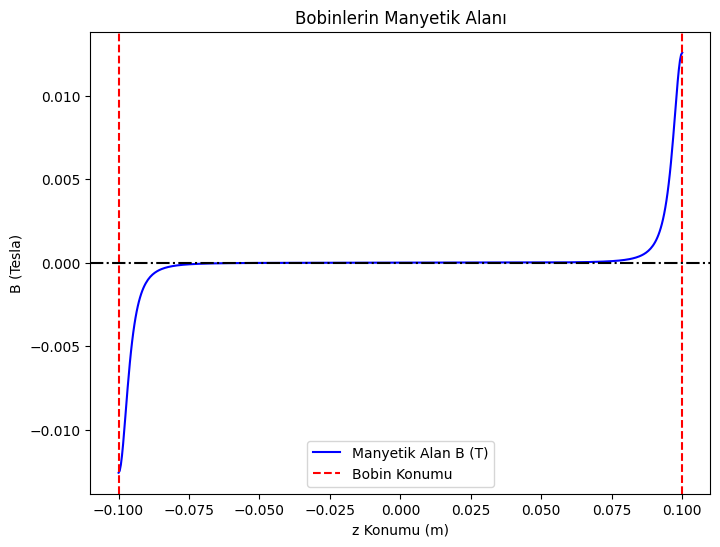

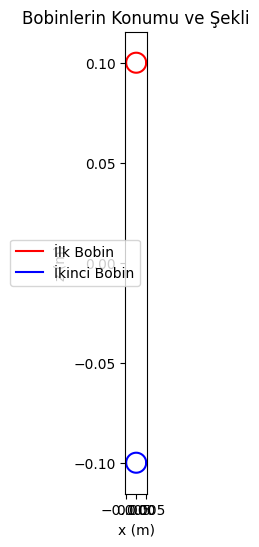

In [ ]:

mu_0 = 4 * np.pi * 1e-7  # Vakum geçirgenliği (T m/A)
r = 0.005  # Bobin yarıçapı (m)
N = 100  # Sarım sayısı
I1 = 1.0  # İlk bobindeki akım (A)
I2 = -1.0  # İkinci bobindeki akım (A) (ters yönde)
z_range = np.linspace(-0.1, 0.1, 500)  # Manyetik alanı hesaplayacağımız z ekseni aralığı

def magnetic_field(z, d):
    """
    Bobinlerin manyetik alanını hesaplar.
    Bobinler z = ±d/2 konumundadır.
    """
    def field_at_point(z0, I):
        return (mu_0 * N * I * r**2) / (2 * (r**2 + (z - z0)**2)**(3/2))

    B1 = field_at_point(d/2, I1)  # İlk bobinin alanı
    B2 = field_at_point(-d/2, I2)  # İkinci bobinin alanı (ters akımlı)
    return B1 + B2

def optimize_distance():
    """
    Manyetik alanın minimum olduğu mesafeyi bulur.
    """
    result = opt.minimize_scalar(lambda d: abs(magnetic_field(0, d)), bounds=(0.01, 0.2), method='bounded')
    return result.x

# Optimum bobin mesafesini hesapla
optimal_distance = optimize_distance()
print(f"Optimum bobin mesafesi: {optimal_distance:.5f} m")

B_values = [magnetic_field(z, optimal_distance) for z in z_range]

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(z_range, B_values, label='Manyetik Alan B (T)', color='b')
ax1.axvline(x=optimal_distance/2, linestyle='--', color='r', label='Bobin Konumu')
ax1.axvline(x=-optimal_distance/2, linestyle='--', color='r')
ax1.axhline(y=0, color='k', linestyle='-.')
ax1.set_xlabel("z Konumu (m)")
ax1.set_ylabel("B (Tesla)")
ax1.legend()
ax1.set_title("Bobinlerin Manyetik Alanı")

fig, ax2 = plt.subplots(figsize=(6, 6))
theta = np.linspace(0, 2*np.pi, 100)
x_coil = r * np.cos(theta)

ax2.plot(x_coil, r * np.sin(theta) + optimal_distance / 2, 'r', label="İlk Bobin")
ax2.plot(x_coil, r * np.sin(theta) - optimal_distance / 2, 'b', label="İkinci Bobin")
ax2.set_aspect('equal')
ax2.legend()
ax2.set_title("Bobinlerin Konumu ve Şekli")
ax2.set_xlabel("x (m)")
ax2.set_ylabel("z (m)")
plt.show()


In [ ]:


mu_0 = 4 * np.pi * 1e-7  # Vacuum permeability (T m/A)
r = 0.005  # Coil radius (m)
L = 0.05  # Coil length (m)
N = 100  # Number of turns
I1 = 1.0  # Current in first coil (A)
I2 = -1.0  # Current in second coil (opposite direction)

def solenoid_field(z, I, coil_z, L, r, N):
    """Magnetic field at position z due to a solenoid centered at coil_z."""
    z_rel = z - coil_z
    term1 = (z_rel + L/2) / np.sqrt(r**2 + (z_rel + L/2)**2)
    term2 = (z_rel - L/2) / np.sqrt(r**2 + (z_rel - L/2)**2)
    return (mu_0 * N * I) / (2 * L) * (term1 - term2)

def total_field(s):
    midpoint = 0.0  # Midpoint between the coils
    B1 = solenoid_field(midpoint, I1, s/2, L, r, N)
    B2 = solenoid_field(midpoint, I2, -s/2, L, r, N)
    return B1 + B2

# Initial guess for the separation distance (meters)
s_guess = 0.1
s_opt = fsolve(total_field, s_guess)[0]

print(f"Optimum distance between coils: {s_opt:.6f} meters")

Optimum distance between coils: 0.100000 meters


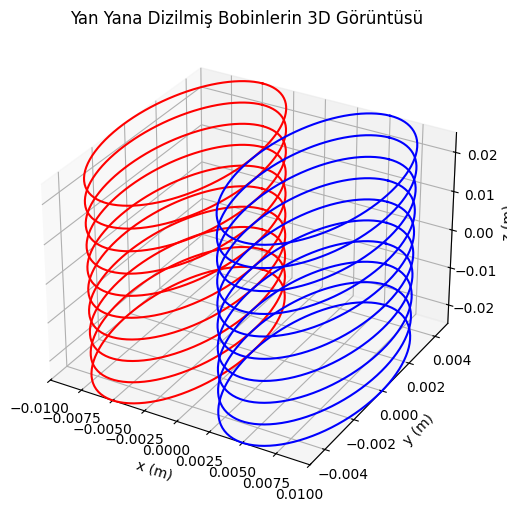

In [ ]:
r = 0.005  # Bobin yarıçapı (m)
L = 0.05   # Bobin yüksekliği (m) (z ekseni boyunca)
N_turns = 10  # Görselleştirme için sarım sayısı
coil_distance = 0.01  # Bobinler arası mesafe (m)

def draw_coil(ax, x_center, color):
    """ x ekseni boyunca dizilmiş bobinleri çizer. """
    theta = np.linspace(0, 2 * np.pi, 100)
    z_vals = np.linspace(-L / 2, L / 2, N_turns)
    
    for z in z_vals:
        y = r * np.cos(theta)
        x = r * np.sin(theta) + x_center  # Bobinleri x ekseni boyunca kaydır
        ax.plot(x, y, z, color=color)

# 3D Grafik çizimi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

draw_coil(ax, -coil_distance / 2, 'r')  # Sol bobin (kırmızı)
draw_coil(ax, coil_distance / 2, 'b')  # Sağ bobin (mavi)

# Eksen ayarları
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_zlabel("z (m)")
ax.set_title("Yan Yana Dizilmiş Bobinlerin 3D Görüntüsü")
ax.set_xlim([-coil_distance, coil_distance])
ax.set_ylim([-r, r])
ax.set_zlim([-L/2, L/2])

plt.show()


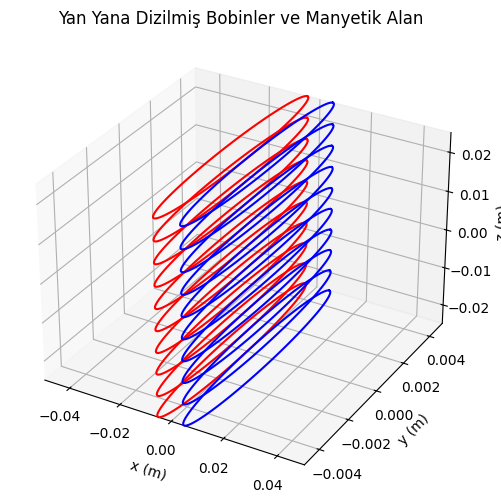

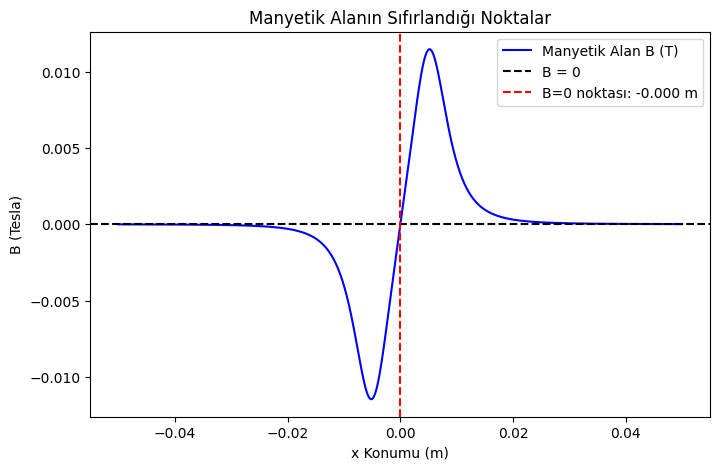

array([-0.0001002])

In [ ]:

mu_0 = 4 * np.pi * 1e-7  # Vakum geçirgenliği (T m/A)

r = 0.005  # Bobin yarıçapı (m)
L = 0.05   # Bobin yüksekliği (m) (z ekseni boyunca)
N_turns = 100  # Bobin sarım sayısı
I1 = 1.0   # İlk bobindeki akım (A)
I2 = -1.0  # İkinci bobindeki akım (A) (ters yönde)
coil_distance = 0.01  # Bobinler arası mesafe (m)


def magnetic_field_x(x, coil_distance, r, N, I):
    """ x ekseni boyunca manyetik alan hesaplar. """
    B = (mu_0 * N * I * r**2) / (2 * (r**2 + (x - coil_distance/2)**2)**(3/2))
    B -= (mu_0 * N * I * r**2) / (2 * (r**2 + (x + coil_distance/2)**2)**(3/2))
    return B

# X ekseni boyunca manyetik alanı hesaplayalım
x_range = np.linspace(-0.05, 0.05, 500)  # X ekseni boyunca aralık
B_values = [magnetic_field_x(x, coil_distance, r, N_turns, I1) for x in x_range]

# Manyetik alanın sıfırlandığı noktaları bulalım
zero_crossings = np.where(np.diff(np.sign(B_values)))[0]
zero_points = x_range[zero_crossings]

def draw_coil(ax, x_center, color):
    theta = np.linspace(0, 2 * np.pi, 100)
    z_vals = np.linspace(-L / 2, L / 2, 10)
    
    for z in z_vals:
        y = r * np.cos(theta)
        x = r * np.sin(theta) + x_center  # Bobinleri x ekseni boyunca kaydır
        ax.plot(x, y, z, color=color)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

draw_coil(ax, -coil_distance / 2, 'r')  # Sol bobin (kırmızı)
draw_coil(ax, coil_distance / 2, 'b')  # Sağ bobin (mavi)

# Eksen ayarları
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_zlabel("z (m)")
ax.set_title("Yan Yana Dizilmiş Bobinler ve Manyetik Alan")
ax.set_xlim([-0.05, 0.05])
ax.set_ylim([-r, r])
ax.set_zlim([-L/2, L/2])
plt.show()

# Manyetik alan grafiği
plt.figure(figsize=(8, 5))
plt.plot(x_range, B_values, label='Manyetik Alan B (T)', color='b')
plt.axhline(y=0, color='k', linestyle='--', label='B = 0')
for zp in zero_points:
    plt.axvline(x=zp, linestyle='--', color='r', label=f'B=0 noktası: {zp:.3f} m')
plt.xlabel("x Konumu (m)")
plt.ylabel("B (Tesla)")
plt.legend()
plt.title("Manyetik Alanın Sıfırlandığı Noktalar")
plt.show()

zero_points


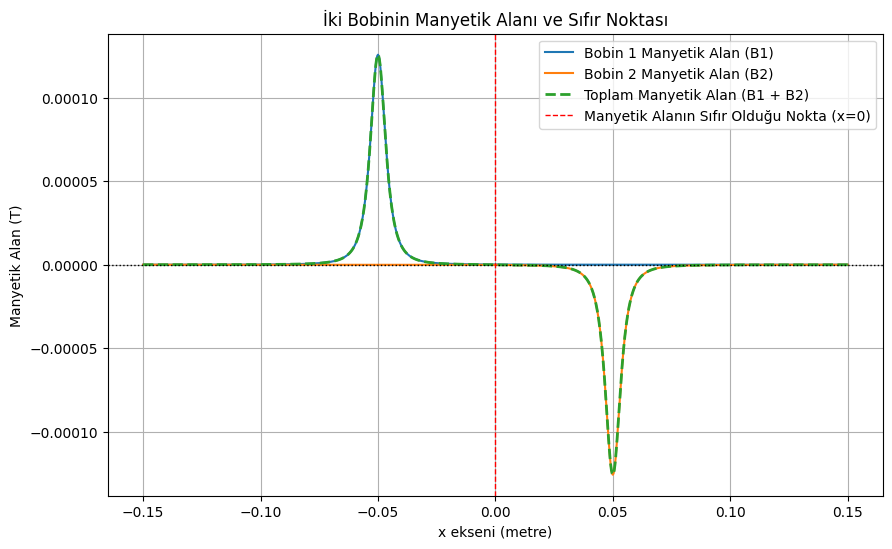

In [ ]:


# Sabitler
mu_0 = 4 * np.pi * 1e-7  # Manyetik sabit (T·m/A)
I = 1.0  # Akım (A)
R = 0.005  # Bobin yarıçapı (0.5 cm -> metre cinsinden)
L = 0.05  # Bobin uzunluğu (5 cm -> metre cinsinden)
d = 0.1  # İki bobin arasındaki mesafe (10 cm -> metre cinsinden)

# Manyetik alan fonksiyonu
def magnetic_field(z, R, I):
    return (mu_0 * I * R**2) / (2 * (R**2 + z**2)**(3/2))

# x ekseni üzerinde noktalar
x = np.linspace(-0.15, 0.15, 1000)  # -15 cm ile +15 cm arası
z = 0  # z ekseni boyunca manyetik alanı hesaplıyoruz

# İki bobinin manyetik alanları
B1 = np.zeros_like(x)
B2 = np.zeros_like(x)

for i, xi in enumerate(x):
    # Birinci bobinin merkezi: x = -d/2
    z1 = xi + d/2
    B1[i] = magnetic_field(z1, R, I)
    
    # İkinci bobinin merkezi: x = d/2
    z2 = xi - d/2
    B2[i] = -magnetic_field(z2, R, I)  # Ters yönde akım

# Toplam manyetik alan
B_total = B1 + B2

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(x, B1, label="Bobin 1 Manyetik Alan (B1)")
plt.plot(x, B2, label="Bobin 2 Manyetik Alan (B2)")
plt.plot(x, B_total, label="Toplam Manyetik Alan (B1 + B2)", linestyle="--", linewidth=2)
plt.axhline(0, color="black", linestyle=":", linewidth=1)  # Manyetik alanın sıfır olduğu çizgi
plt.axvline(0, color="red", linestyle="--", linewidth=1, label="Manyetik Alanın Sıfır Olduğu Nokta (x=0)")
plt.xlabel("x ekseni (metre)")
plt.ylabel("Manyetik Alan (T)")
plt.title("İki Bobinin Manyetik Alanı ve Sıfır Noktası")
plt.legend()
plt.grid()
plt.show()


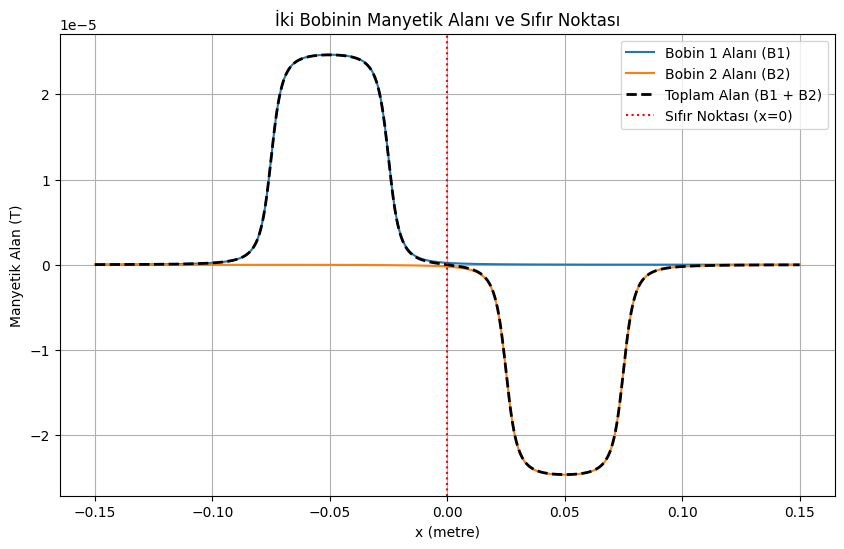

In [ ]:

mu_0 = 4 * np.pi * 1e-7  # T·m/A
I = 1.0  # Akım (A)
R = 0.005  # Yarıçap (0.5 cm -> metre)
L = 0.05  # Uzunluk (5 cm -> metre)
d = 0.1  # Bobinler arası mesafe (10 cm -> metre)

# Manyetik alan fonksiyonu (sonlu bobin)
def bobin_alan(x, bobmerkez):
    z = x - bobmerkez
    term1 = (z + L/2) / np.sqrt(R**2 + (z + L/2)**2)
    term2 = (z - L/2) / np.sqrt(R**2 + (z - L/2)**2)
    return (mu_0 * I) / (2 * L) * (term1 - term2)

# x ekseni üzerinde noktalar
x = np.linspace(-0.15, 0.15, 1000)  # -15 cm ile +15 cm arası

# Bobin 1 (x = -d/2) ve Bobin 2 (x = +d/2) alanları
B1 = bobin_alan(x, -d/2)
B2 = -bobin_alan(x, d/2)  # Ters akım nedeniyle "-" işareti
B_toplam = B1 + B2

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(x, B1, label="Bobin 1 Alanı (B1)")
plt.plot(x, B2, label="Bobin 2 Alanı (B2)")
plt.plot(x, B_toplam, 'k--', linewidth=2, label="Toplam Alan (B1 + B2)")
plt.axvline(0, color='red', linestyle=':', label="Sıfır Noktası (x=0)")
plt.xlabel("x (metre)")
plt.ylabel("Manyetik Alan (T)")
plt.title("İki Bobinin Manyetik Alanı ve Sıfır Noktası")
plt.legend()
plt.grid()
plt.show()

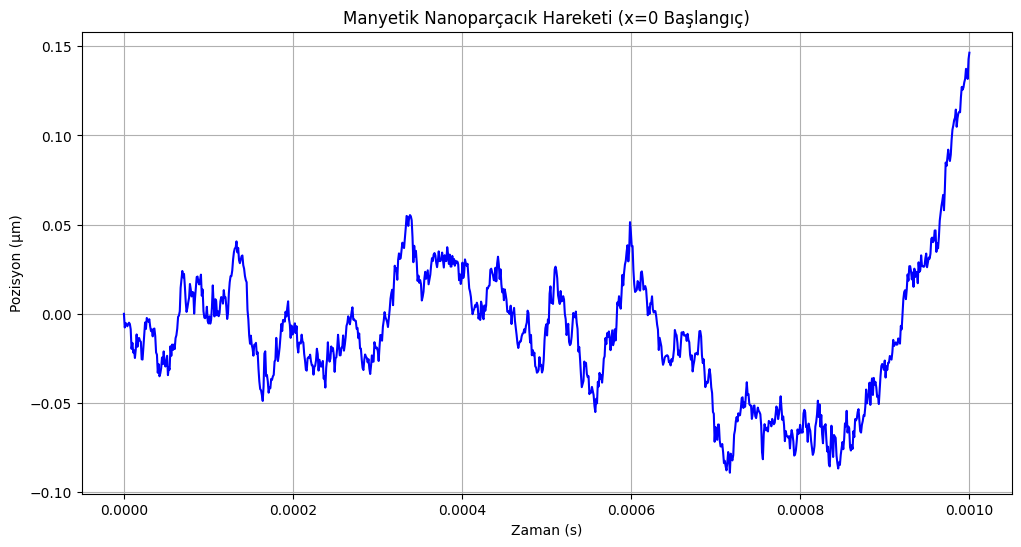

In [ ]:

mu_0 = 4 * np.pi * 1e-7  # T·m/A
I = 1.0  # Akım (A)
R = 0.005  # Bobin yarıçapı (0.5 cm)
L = 0.05  # Bobin uzunluğu (5 cm)
d = 0.1  # Bobinler arası mesafe (10 cm)

# Nanoparçacık özellikleri
r_nano = 15e-9  # Yarıçap (15 nm)
V = (4/3) * np.pi * r_nano**3  # Hacim
chi = 0.4  # Manyetik duyarlılık (Fe3O4 için)
eta = 1e-3  # Suyun viskozitesi (Pa·s)
T = 300  # Sıcaklık (K)
k_B = 1.38e-23  # Boltzmann sabiti

# Manyetik alan fonksiyonu
def manyetik_alan(x):
    # Bobin 1 (x = -d/2)
    z1 = x + d/2
    term1_top = (z1 + L/2) / np.sqrt(R**2 + (z1 + L/2)**2)
    term1_bottom = (z1 - L/2) / np.sqrt(R**2 + (z1 - L/2)**2)
    B1 = (mu_0 * I) / (2 * L) * (term1_top - term1_bottom)
    
    # Bobin 2 (x = d/2, ters akım)
    z2 = x - d/2
    term2_top = (z2 + L/2) / np.sqrt(R**2 + (z2 + L/2)**2)
    term2_bottom = (z2 - L/2) / np.sqrt(R**2 + (z2 - L/2)**2)
    B2 = -(mu_0 * I) / (2 * L) * (term2_top - term2_bottom)  # Ters akım
    
    return B1 + B2

# Gradyanı merkezi fark ile hesaplayan fonksiyon
def manyetik_alan_gradyani(x, dx=1e-9):
    return (manyetik_alan(x + dx) - manyetik_alan(x - dx)) / (2 * dx)

# Zaman parametreleri
dt = 1e-6  # Zaman adımı (s)
t_max = 1e-3  # Toplam süre (s)
steps = int(t_max / dt)
t = np.linspace(0, t_max, steps)

# Başlangıç koşulları
x0 = 0.0  # Başlangıç pozisyonu
v0 = 0.0  # Başlangıç hızı

# Hareket simülasyonu
x = np.zeros(steps)
x[0] = x0

for i in range(1, steps):
    B = manyetik_alan(x[i-1])
    dB_dx = manyetik_alan_gradyani(x[i-1])
    
    # Manyetik kuvvet (paramanyetik)
    F_manyetik = (chi * V / mu_0) * B * dB_dx
    
    # Termal kuvvet (Brown hareketi)
    gamma = 6 * np.pi * eta * r_nano  # Sürtünme katsayısı
    F_termal = np.sqrt(2 * gamma * k_B * T / dt) * np.random.normal()
    
    # Hız ve pozisyon güncelleme (overdamped Langevin dinamiği)
    dx = (F_manyetik + F_termal) / gamma * dt
    x[i] = x[i-1] + dx

# Grafik çizimi
plt.figure(figsize=(12, 6))
plt.plot(t, x * 1e6, 'b-')  # Pozisyonu mikrometre cinsinden göster
plt.xlabel('Zaman (s)')
plt.ylabel('Pozisyon (µm)')
plt.title('Manyetik Nanoparçacık Hareketi (x=0 Başlangıç)')
plt.grid()
plt.show()


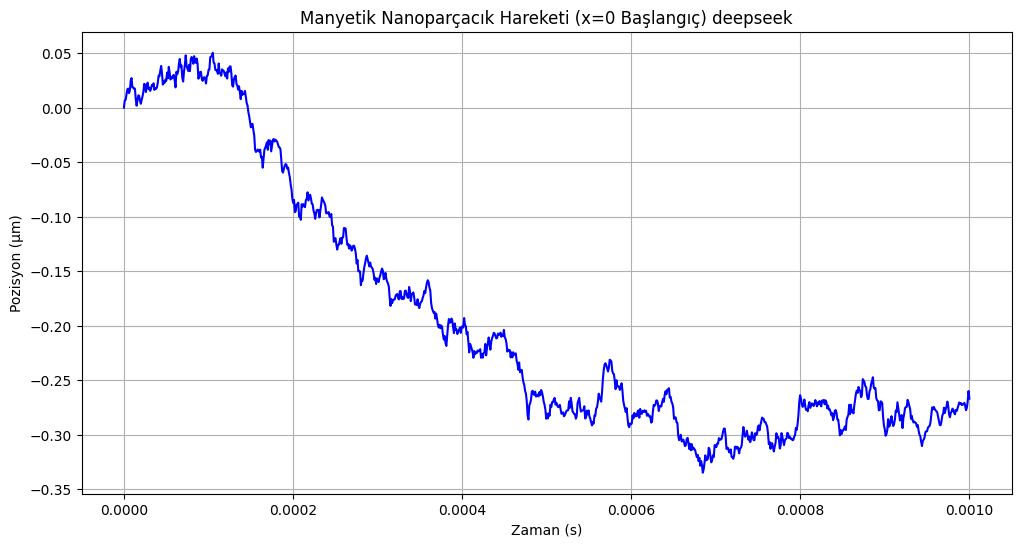

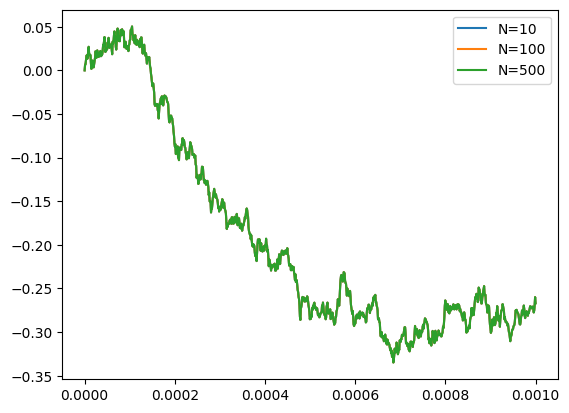

In [ ]:

mu_0 = 4 * np.pi * 1e-7  # T·m/A
I = 1.0  # Akım (A)
N = 100  # SARIM SAYISI (yeni eklenen parametre)
R = 0.005  # Bobin yarıçapı (0.5 cm)
L = 0.05  # Bobin uzunluğu (5 cm)
d = 0.1  # Bobinler arası mesafe (10 cm)


# Nanoparçacık 
r_nano = 20e-9  # Yarıçap (15 nm)
V = (4/3) * np.pi * r_nano**3  # Hacim
chi = 0.4  # Manyetik duyarlılık (Fe3O4 için)
eta = 1e-3  # Suyun viskozitesi (Pa·s)
T = 300  # Sıcaklık (K)
k_B = 1.38e-23  # Boltzmann sabiti

def manyetik_alan(x):
    # Bobin 1 (x = -d/2)
    z1 = x + d/2
    term1_top = (z1 + L/2) / np.sqrt(R**2 + (z1 + L/2)**2)
    term1_bottom = (z1 - L/2) / np.sqrt(R**2 + (z1 - L/2)**2)
    B1 = (mu_0 * N * I) / (2 * L) * (term1_top - term1_bottom)   
    # Bobin 2 (x = d/2, ters akım)
    z2 = x - d/2
    term2_top = (z2 + L/2) / np.sqrt(R**2 + (z2 + L/2)**2)
    term2_bottom = (z2 - L/2) / np.sqrt(R**2 + (z2 - L/2)**2)
    B2 = -(mu_0 * N * I) / (2 * L) * (term2_top - term2_bottom)
    return B1 + B2
def manyetik_gradyani(x):
    dx = 1e-9
    B_plus = manyetik_alan(x + dx)
    B_minus = manyetik_alan(x - dx)
    dB_dx = (B_plus - B_minus) / (2 * dx)
    return dB_dx

dt = 1e-6  # Zaman adımı (s)
t_max = 1e-3  # Toplam süre (s)
steps = int(t_max / dt)
t = np.linspace(0, t_max, steps)

# Başlangıç koşulları
x0 = 0.0  # Başlangıç pozisyonu
v0 = 0.0

x = np.zeros(steps)
x[0] = x0

for i in range(1, steps):
    B = manyetik_alan(x[i-1])
    dB_dx = manyetik_gradyani(x[i-1])
    
    # Manyetik kuvvet
    F_manyetik = (chi * V / mu_0) * B * dB_dx  # Düzeltildi
    
    # Termal kuvvet
    gamma = 6 * np.pi * eta * r_nano
    F_termal = np.sqrt(2 * gamma * k_B * T / dt) * np.random.normal()
    
    # Pozisyon güncelleme
    dx = (F_manyetik + F_termal) / gamma * dt
    x[i] = x[i-1] + dx

plt.figure(figsize=(12, 6))
plt.plot(t, x * 1e6, 'b-')
plt.xlabel('Zaman (s)')
plt.ylabel('Pozisyon (µm)')
plt.title('Manyetik Nanoparçacık Hareketi (x=0 Başlangıç) deepseek')
plt.grid()
plt.show()






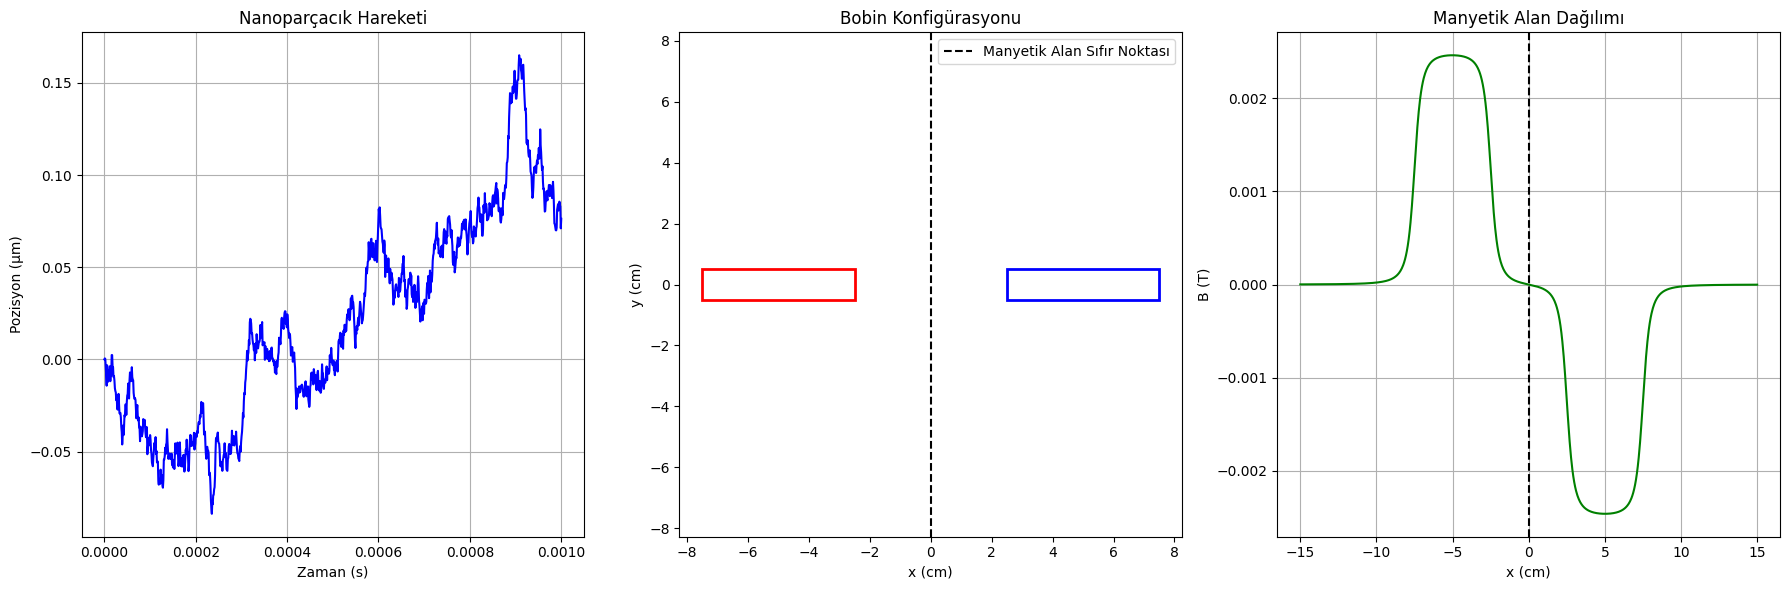

x=0 noktasındaki manyetik alan: 0.00e+00 T
x=0 noktasındaki manyetik alan gradyanı: -0.00 T/m


In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(t, x * 1e6, 'b-')
plt.xlabel('Zaman (s)')
plt.ylabel('Pozisyon (µm)')
plt.title('Nanoparçacık Hareketi')
plt.grid()

plt.subplot(1, 3, 2)
bobin_yari_cap = R * 100  # cm cinsinden
bobin_uzunluk = L * 100  # cm cinsinden

plt.gca().add_patch(plt.Rectangle(
    (-d/2*100 - bobin_uzunluk/2, -bobin_yari_cap),
    bobin_uzunluk,
    2*bobin_yari_cap,
    edgecolor='red',
    facecolor='none',
    linewidth=2
))

plt.gca().add_patch(plt.Rectangle(
    (d/2*100 - bobin_uzunluk/2, -bobin_yari_cap),
    bobin_uzunluk,
    2*bobin_yari_cap,
    edgecolor='blue',
    facecolor='none',
    linewidth=2
))

plt.axvline(0, color='black', linestyle='--', label='Manyetik Alan Sıfır Noktası')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.title('Bobin Konfigürasyonu')
plt.axis('equal')
plt.legend()

plt.subplot(1, 3, 3)
x_values = np.linspace(-0.15, 0.15, 1000)  # ±15 cm aralığı
B_values = [manyetik_alan(x) for x in x_values]

plt.plot(x_values*100, B_values, 'g-')  # x'i cm cinsinden göster
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('x (cm)')
plt.ylabel('B (T)')
plt.title('Manyetik Alan Dağılımı')
plt.grid()

plt.tight_layout()
plt.show()

x_zero = 0.0
B_at_zero = manyetik_alan(x_zero)
dB_dx_at_zero = manyetik_gradyani(x_zero)

print(f"x=0 noktasındaki manyetik alan: {B_at_zero:.2e} T")
print(f"x=0 noktasındaki manyetik alan gradyanı: {dB_dx_at_zero:.2f} T/m")

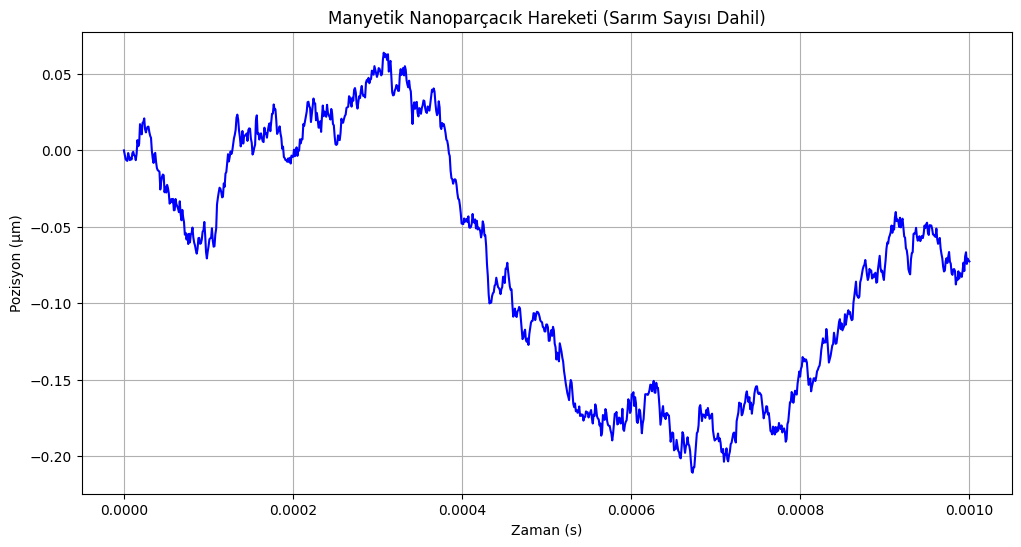

In [ ]:
mu_0 = 4 * np.pi * 1e-7  # T·m/A
I = 1.0  # Akım (A)
R = 0.005  # Bobin yarıçapı (0.5 cm)
L = 0.05  # Bobin uzunluğu (5 cm)
d = 0.1  # Bobinler arası mesafe (10 cm)
N = 100  # Sarım sayısı

# Nanoparçacık özellikleri
r_nano = 20e-9  # Yarıçap (20 nm)
V = (4/3) * np.pi * r_nano**3  # Hacim
chi = 0.4  # Manyetik duyarlılık (Fe3O4 için)
eta = 1e-3  # Suyun viskozitesi (Pa·s)
T = 300  # Sıcaklık (K)
k_B = 1.38e-23  # Boltzmann sabiti

# Manyetik alan fonksiyonu (sarım sayısını dahil ederek)
def manyetik_alan(x):
    # Bobin 1 (x = -d/2)
    z1 = x + d/2
    term1_top = (z1 + L/2) / np.sqrt(R**2 + (z1 + L/2)**2)
    term1_bottom = (z1 - L/2) / np.sqrt(R**2 + (z1 - L/2)**2)
    B1 = (mu_0 * N * I) / (2 * L) * (term1_top - term1_bottom)
    
    # Bobin 2 (x = d/2, ters akım)
    z2 = x - d/2
    term2_top = (z2 + L/2) / np.sqrt(R**2 + (z2 + L/2)**2)
    term2_bottom = (z2 - L/2) / np.sqrt(R**2 + (z2 - L/2)**2)
    B2 = -(mu_0 * N * I) / (2 * L) * (term2_top - term2_bottom)  # Ters akım
    
    return B1 + B2
def manyetik_gradyani(x):
    dx = 1e-9
    B_plus = manyetik_alan(x + dx)
    B_minus = manyetik_alan(x - dx)
    dB_dx = (B_plus - B_minus) / (2 * dx)
    return dB_dx

dt = 1e-6  # Zaman adımı (s)
t_max = 1e-3  # Toplam süre (s)
steps = int(t_max / dt)
t = np.linspace(0, t_max, steps)

# Başlangıç koşulları
x0 = 0.0  # Başlangıç pozisyonu
x = np.zeros(steps)
x[0] = x0

# Hareket simülasyonu
for i in range(1, steps):
    B = manyetik_alan(x[i-1])
    dB_dx = manyetik_gradyani(x[i-1])
    
    # Manyetik kuvvet
    F_manyetik = (chi * V / mu_0) * B * dB_dx  # Düzeltildi
    
    # Termal kuvvet
    gamma = 6 * np.pi * eta * r_nano
    F_termal = np.sqrt(2 * gamma * k_B * T / dt) * np.random.normal()
    
    # Pozisyon güncelleme
    dx = (F_manyetik + F_termal) / gamma * dt
    x[i] = x[i-1] + dx

# Grafik
plt.figure(figsize=(12, 6))
plt.plot(t, x * 1e6, 'b-')
plt.xlabel('Zaman (s)')
plt.ylabel('Pozisyon (µm)')
plt.title('Manyetik Nanoparçacık Hareketi (Sarım Sayısı Dahil)')
plt.grid()
plt.show()


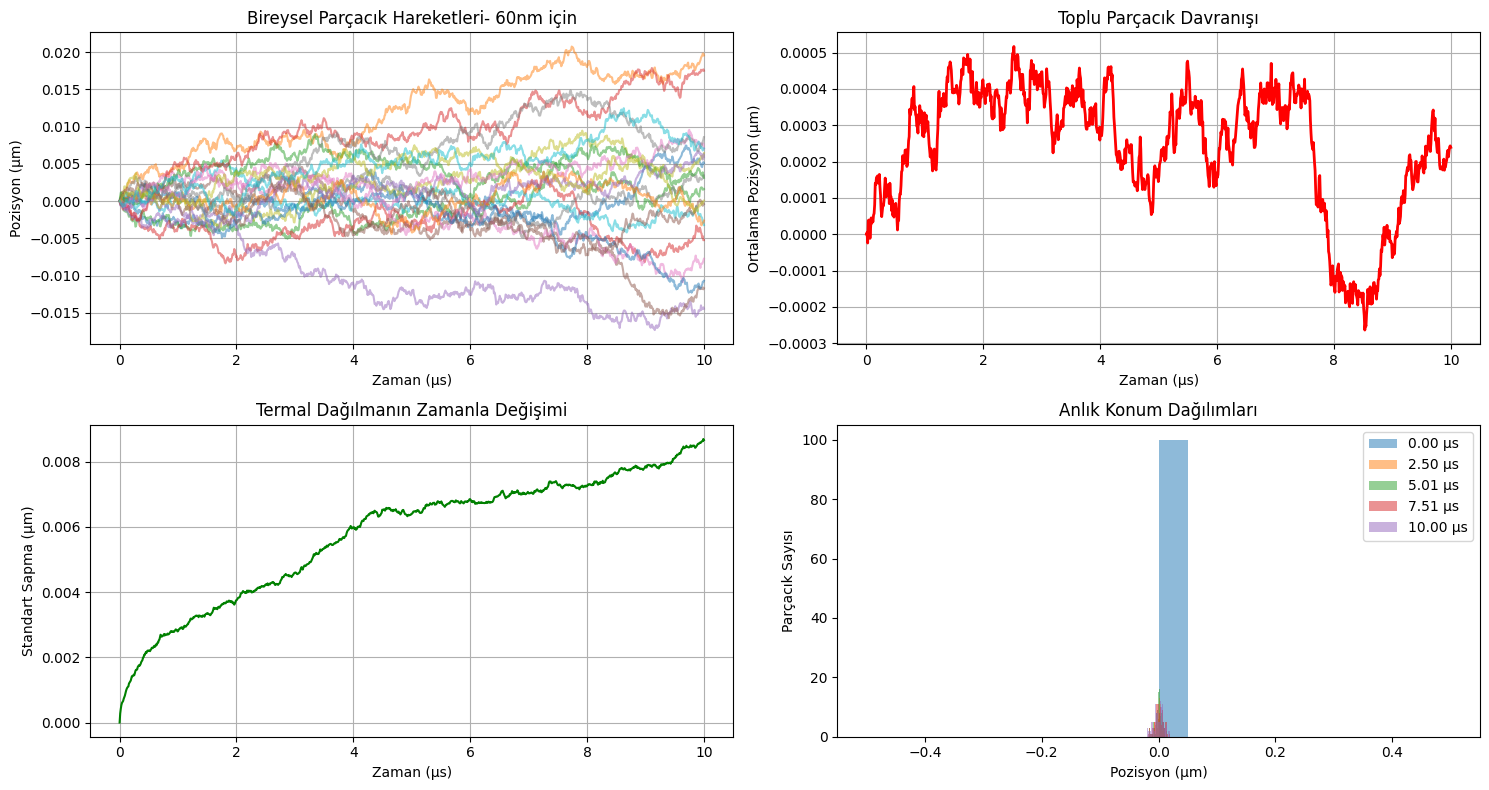

In [57]:
# Manyetik nanoparçacıklar sayıca fazla --- deepseek
import numpy as np
import matplotlib.pyplot as plt

# Sabitler
mu_0 = 4 * np.pi * 1e-7
I = 1.0
N = 100  # Manyetik kuvveti artırmak için sarım sayısı artırıldı
R = 0.005
L = 0.05
d = 0.1

# Nanoparçacık özellikleri
r_nano = 60e-9
V = (4/3) * np.pi * r_nano**3
chi = 0.4
eta = 1e-3
T = 300
k_B = 1.38e-23

# Simülasyon parametreleri
num_particles = 100  # Parçacık sayısı
dt = 1e-8  # Zaman adımı küçültüldü
t_max = 1e-5  # Süre kısaltıldı
steps = int(t_max / dt)
t = np.linspace(0, t_max, steps)

# Manyetik alan fonksiyonları (öncekiyle aynı)
def manyetik_alan(x):
    z1 = x + d/2
    term1_top = (z1 + L/2)/np.sqrt(R**2 + (z1 + L/2)**2)
    term1_bottom = (z1 - L/2)/np.sqrt(R**2 + (z1 - L/2)**2)
    B1 = (mu_0 * N * I)/(2*L) * (term1_top - term1_bottom)
    
    z2 = x - d/2
    term2_top = (z2 + L/2)/np.sqrt(R**2 + (z2 + L/2)**2)
    term2_bottom = (z2 - L/2)/np.sqrt(R**2 + (z2 - L/2)**2)
    B2 = -(mu_0 * N * I)/(2*L) * (term2_top - term2_bottom)
    
    return B1 + B2

def manyetik_gradyani(x):
    dx = 1e-9
    return (manyetik_alan(x + dx) - manyetik_alan(x - dx))/(2*dx)

# Çoklu parçacık simülasyonu
np.random.seed(42)  # Tekrarlanabilirlik için
x = np.zeros((num_particles, steps))

for p in range(num_particles):
    x[p, 0] = 0.0  # Tüm parçacıklar x=0'da başlıyor
    for i in range(1, steps):
        B = manyetik_alan(x[p, i-1])
        dB_dx = manyetik_gradyani(x[p, i-1])
        
        F_manyetik = (chi * V / mu_0) * B * dB_dx
        gamma = 6 * np.pi * eta * r_nano
        F_termal = np.sqrt(2 * gamma * k_B * T / dt) * np.random.normal()
        
        dx = (F_manyetik + F_termal)/gamma * dt
        x[p, i] = x[p, i-1] + dx

# Analiz ve görselleştirme
plt.figure(figsize=(15, 8))

# 1. Bireysel Trajektoriler
plt.subplot(2, 2, 1)
for p in range(min(num_particles, 20)):  # İlk 20 parçacığı göster
    plt.plot(t*1e6, x[p]*1e6, alpha=0.5)
plt.xlabel('Zaman (µs)')
plt.ylabel('Pozisyon (µm)')
plt.title('Bireysel Parçacık Hareketleri- 60nm için')
plt.grid()

# 2. Ortalama Pozisyon
mean_x = np.mean(x, axis=0)
plt.subplot(2, 2, 2)
plt.plot(t*1e6, mean_x*1e6, 'r-', linewidth=2)
plt.xlabel('Zaman (µs)')
plt.ylabel('Ortalama Pozisyon (µm)')
plt.title('Toplu Parçacık Davranışı')
plt.grid()

# 3. Standart Sapma
std_x = np.std(x, axis=0)
plt.subplot(2, 2, 3)
plt.plot(t*1e6, std_x*1e6, 'g-')
plt.xlabel('Zaman (µs)')
plt.ylabel('Standart Sapma (µm)')
plt.title('Termal Dağılmanın Zamanla Değişimi')
plt.grid()

# 4. Anlık Dağılım
plt.subplot(2, 2, 4)
for t_idx in [0, steps//4, steps//2, 3*steps//4, -1]:
    plt.hist(x[:, t_idx]*1e6, bins=20, alpha=0.5, 
             label=f'{t[t_idx]*1e6:.2f} µs')
plt.xlabel('Pozisyon (µm)')
plt.ylabel('Parçacık Sayısı')
plt.title('Anlık Konum Dağılımları')
plt.legend()
plt.tight_layout()

plt.show()

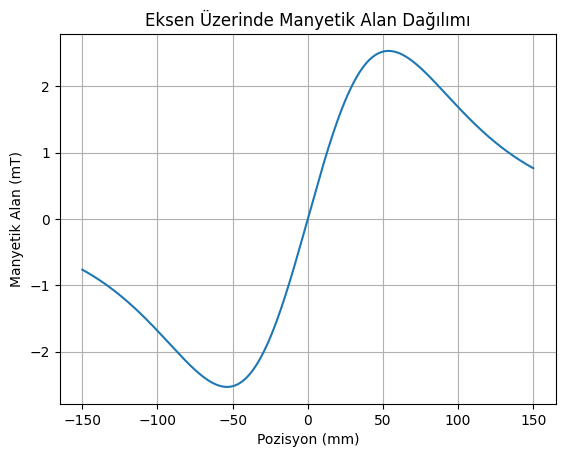

In [4]:
# Manyetik alan profilini çizdirmek için örnek kod
x_vals = np.linspace(-0.15, 0.15, 1000)
B_vals = manyetik_alan(x_vals)

plt.figure()
plt.plot(x_vals*1e3, B_vals*1e3)
plt.xlabel('Pozisyon (mm)')
plt.ylabel('Manyetik Alan (mT)')
plt.title('Eksen Üzerinde Manyetik Alan Dağılımı')
plt.grid()
plt.show()

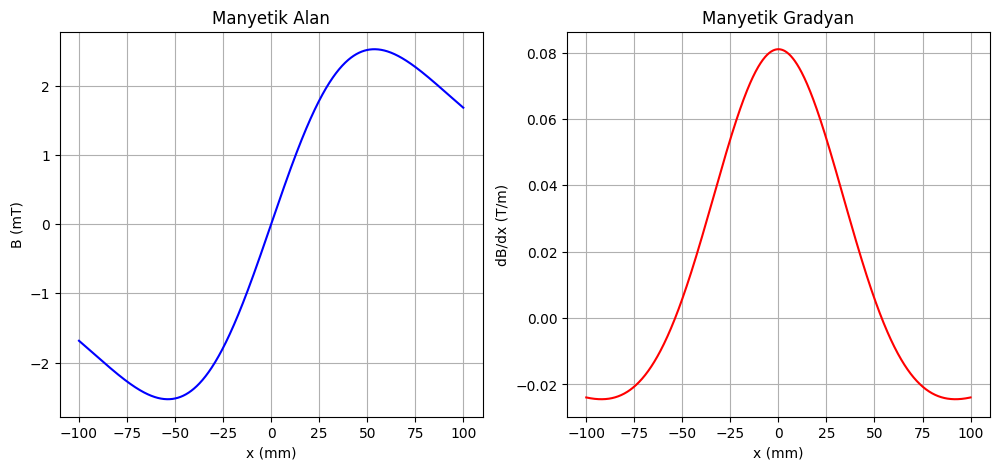

In [5]:
x_vals = np.linspace(-0.1, 0.1, 1000)
B_vals = manyetik_alan(x_vals)
dB_dx_vals = manyetik_gradyani(x_vals)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_vals*1e3, B_vals*1e3, 'b-')
plt.xlabel('x (mm)')
plt.ylabel('B (mT)')
plt.title('Manyetik Alan')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x_vals*1e3, dB_dx_vals, 'r-')
plt.xlabel('x (mm)')
plt.ylabel('dB/dx (T/m)')
plt.title('Manyetik Gradyan')
plt.grid()
plt.show()

Manyetik alanın sıfır olduğu nokta: x = 0.000000 m


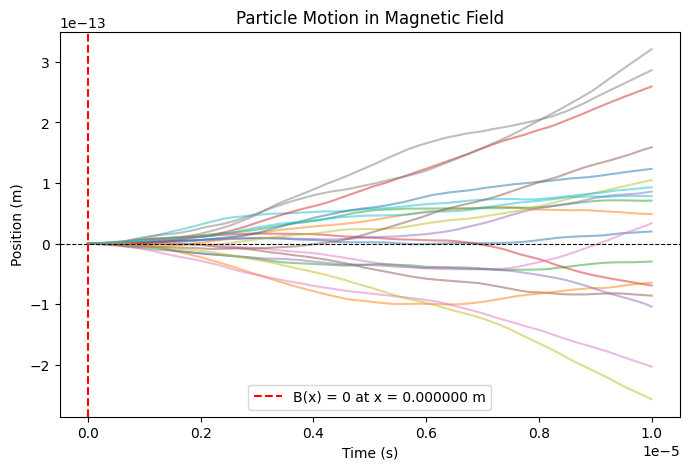

In [ ]:

mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability of free space (H/m)
I = 10  # Current (A)
N = 100  # Number of turns
R = 0.1  # Coil radius (m)
L = 0.2  # Coil length (m)
d = 0.05  # Distance between coils (m)

# Nanoparticle properties
r_nano = 5e-9  # Nanoparticle radius (m)
V = (4/3) * np.pi * r_nano**3  # Nanoparticle volume (m^3)
chi = 0.1  # Magnetic susceptibility
eta = 1e-3  # Fluid viscosity (Pa·s)
T = 300  # Temperature (K)
k_B = 1.38e-23  # Boltzmann constant (J/K)

# Simulation parameters
num_particles = 100
dt = 1e-8  # Time step (s)
t_max = 1e-5  # Total simulation time (s)
steps = int(t_max / dt)

# Magnetic field function
def manyetik_alan(x):
    B1 = (mu_0 * N * I * R**2) / (2 * (R**2 + (x - d/2)**2)**(3/2))
    B2 = (mu_0 * N * I * R**2) / (2 * (R**2 + (x + d/2)**2)**(3/2))
    return B1 - B2  # Opposite currents

# Magnetic field gradient
def manyetik_gradyani(x):
    h = 1e-6  # Small step for numerical differentiation
    return (manyetik_alan(x + h) - manyetik_alan(x - h)) / (2 * h)

# Find zero of the magnetic field (where B(x) = 0)
x_zero = fsolve(manyetik_alan, 0)[0]
print(f"Manyetik alanın sıfır olduğu nokta: x = {x_zero:.6f} m")

# Particle positions
x = np.zeros((num_particles, steps))

# Simulation loop
for p in range(num_particles):
    x[p, 0] = 0  # Initial position
    v = 0  # Initial velocity
    for t in range(1, steps):
        B = manyetik_alan(x[p, t-1])
        dBdx = manyetik_gradyani(x[p, t-1])
        F_manyetik = (chi * V / mu_0) * B * dBdx
        gamma = 6 * np.pi * eta * r_nano
        F_termal = np.sqrt(2 * gamma * k_B * T / dt) * np.random.randn()
        F_total = F_manyetik + F_termal
        v += (F_total / gamma) * dt
        x[p, t] = x[p, t-1] + v * dt

# Plotting results
plt.figure(figsize=(8, 5))
for p in range(min(num_particles, 20)):
    plt.plot(np.linspace(0, t_max, steps), x[p, :], alpha=0.5)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(x_zero, color='red', linestyle='--', label=f'B(x) = 0 at x = {x_zero:.6f} m')
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.title("Particle Motion in Magnetic Field")
plt.show()


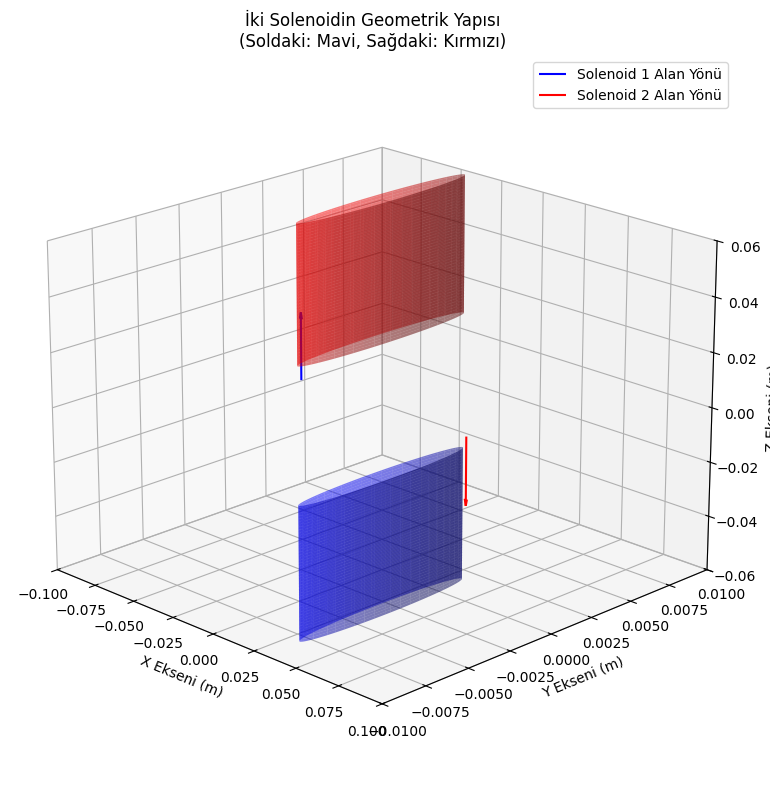

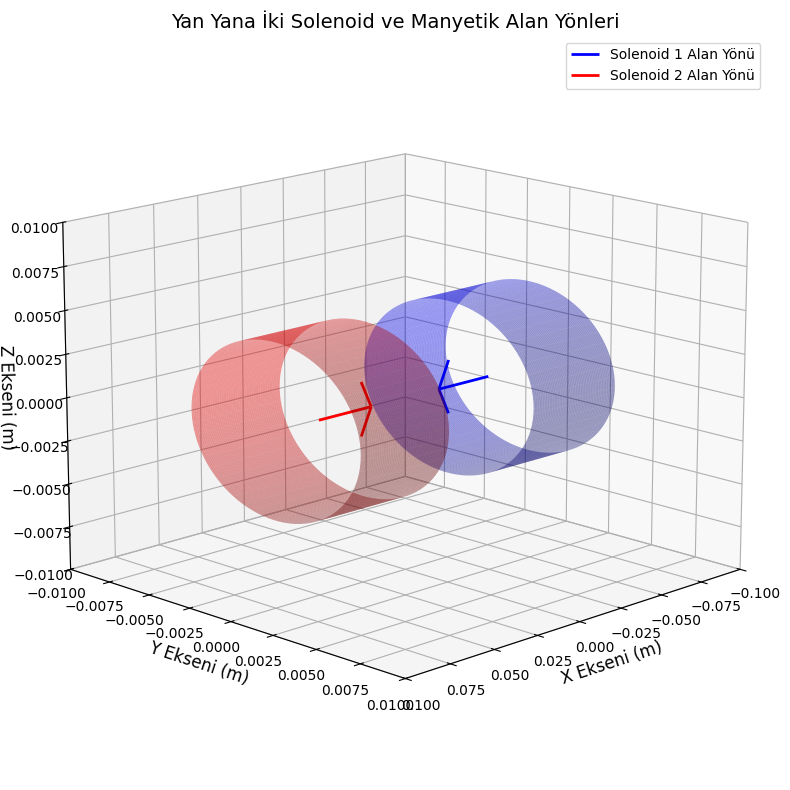

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parametreler
d = 0.1    # Solenoid merkezleri arası mesafe
L = 0.05   # Her bir solenoidin uzunluğu
R = 0.005  # Solenoid yarıçapı

# X-ekseni boyunca silindir çizme fonksiyonu
def solenoid_x_ekseni(r, uzunluk, x_merkez, cozunurluk=100, renk='b', ax=None):
    x = np.linspace(x_merkez - uzunluk/2, x_merkez + uzunluk/2, cozunurluk)
    theta = np.linspace(0, 2*np.pi, cozunurluk)
    theta_grid, x_grid = np.meshgrid(theta, x)
    
    y_grid = r * np.cos(theta_grid)
    z_grid = r * np.sin(theta_grid)
    
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.4, color=renk)

# 3B Görselleştirme
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Solenoid 1 (Solda)
solenoid_x_ekseni(R, L, x_merkez=-d/2, renk='blue', ax=ax)

# Solenoid 2 (Sağda)
solenoid_x_ekseni(R, L, x_merkez=d/2, renk='red', ax=ax)

# Manyetik Alan Yönleri
arrow_length = 0.03
ax.quiver(-d/2, 0, 0, arrow_length, 0, 0, color='blue', linewidth=2, 
          arrow_length_ratio=0.2, label='Solenoid 1 Alan Yönü')
ax.quiver(d/2, 0, 0, -arrow_length, 0, 0, color='red', linewidth=2,
          arrow_length_ratio=0.2, label='Solenoid 2 Alan Yönü')

# Eksen ve Etiketler
ax.set_xlabel('X Ekseni (m)', fontsize=12)
ax.set_ylabel('Y Ekseni (m)', fontsize=12)
ax.set_zlabel('Z Ekseni (m)', fontsize=12)
ax.set_title('Yan Yana İki Solenoid ve Manyetik Alan Yönleri', fontsize=14)

# Görüntüleme Sınırları
ax.set_xlim([-0.1, 0.1])
ax.set_ylim([-0.01, 0.01])
ax.set_zlim([-0.01, 0.01])

# Görüş Açısı ve Detaylar
ax.view_init(elev=15, azim=45)
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

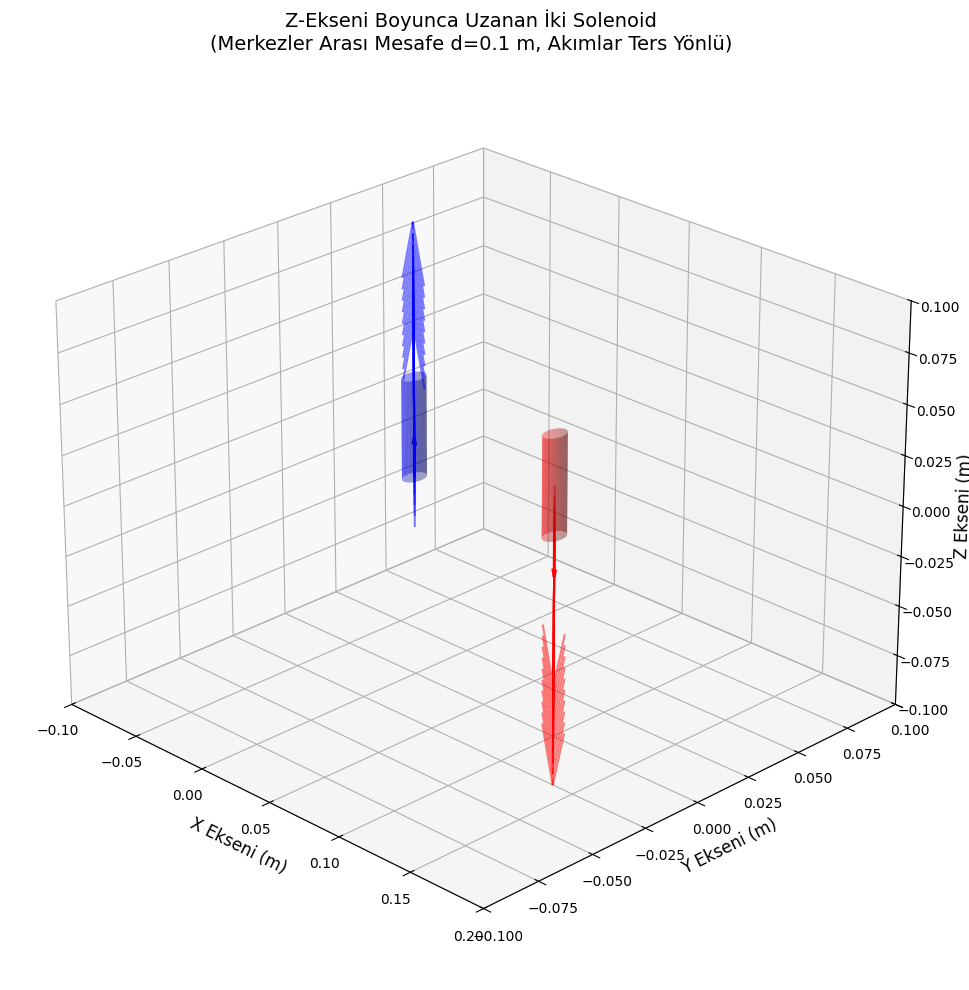

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parametreler
mu_0 = 4 * np.pi * 1e-7
I = 1.0  # Akım büyüklüğü
N = 100  # Sarım sayısı
R = 0.005  # Solenoid yarıçapı (5 mm)
L = 0.05   # Solenoid uzunluğu (5 cm)
d = 0.1    # Merkezler arası mesafe (10 cm)

# 3B Solenoid Çizim Fonksiyonu (Z-ekseni boyunca)
def solenoid_z_ekseni(r, uzunluk, x_merkez, y_merkez, cozunurluk=100, renk='b', akim_yonu=1, ax=None):
    z = np.linspace(-uzunluk/2, uzunluk/2, cozunurluk)
    theta = np.linspace(0, 2*np.pi, cozunurluk)
    theta_grid, z_grid = np.meshgrid(theta, z)
    
    x_grid = x_merkez + r * np.cos(theta_grid)
    y_grid = y_merkez + r * np.sin(theta_grid)
    
    ax.plot_surface(x_grid, y_grid, z_grid + uzunluk/2, alpha=0.4, color=renk)  # Taban x-y düzleminde
    
    # Akım yönü okları
    arrow_start = (x_merkez, y_merkez, 0)
    arrow_end = (x_merkez, y_merkez, akim_yonu*0.02)
    ax.quiver(*arrow_start, 0, 0, akim_yonu*0.02, color=renk, arrow_length_ratio=0.2, linewidth=2)

# 3B Görselleştirme
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Solenoid 1 (Merkez (0,0,0), Akım +z yönünde)
solenoid_z_ekseni(R, L, x_merkez=0, y_merkez=0, renk='blue', akim_yonu=+1, ax=ax)

# Solenoid 2 (Merkez (d,0,0), Akım -z yönünde)
solenoid_z_ekseni(R, L, x_merkez=d, y_merkez=0, renk='red', akim_yonu=-1, ax=ax)

# Manyetik Alan Çizgileri (Kalitatif Gösterim)
z_vals = np.linspace(-L/2, L/2, 10)
for z in z_vals:
    ax.quiver(0, 0, z, 0, 0, 0.1, color='blue', alpha=0.5)  # Solenoid 1 alanı (+z)
    ax.quiver(d, 0, z, 0, 0, -0.1, color='red', alpha=0.5)  # Solenoid 2 alanı (-z)

# Eksen ve Etiketler
ax.set_xlabel('X Ekseni (m)', fontsize=12)
ax.set_ylabel('Y Ekseni (m)', fontsize=12)
ax.set_zlabel('Z Ekseni (m)', fontsize=12)
ax.set_title(f'Z-Ekseni Boyunca Uzanan İki Solenoid\n(Merkezler Arası Mesafe d={d} m, Akımlar Ters Yönlü)', fontsize=14)
ax.set_xlim([-0.1, d+0.1])
ax.set_ylim([-0.1, 0.1])
ax.set_zlim([-0.1, 0.1])

# Görüş Açısı
ax.view_init(elev=25, azim=-45)
plt.grid(True)
plt.tight_layout()
plt.show()

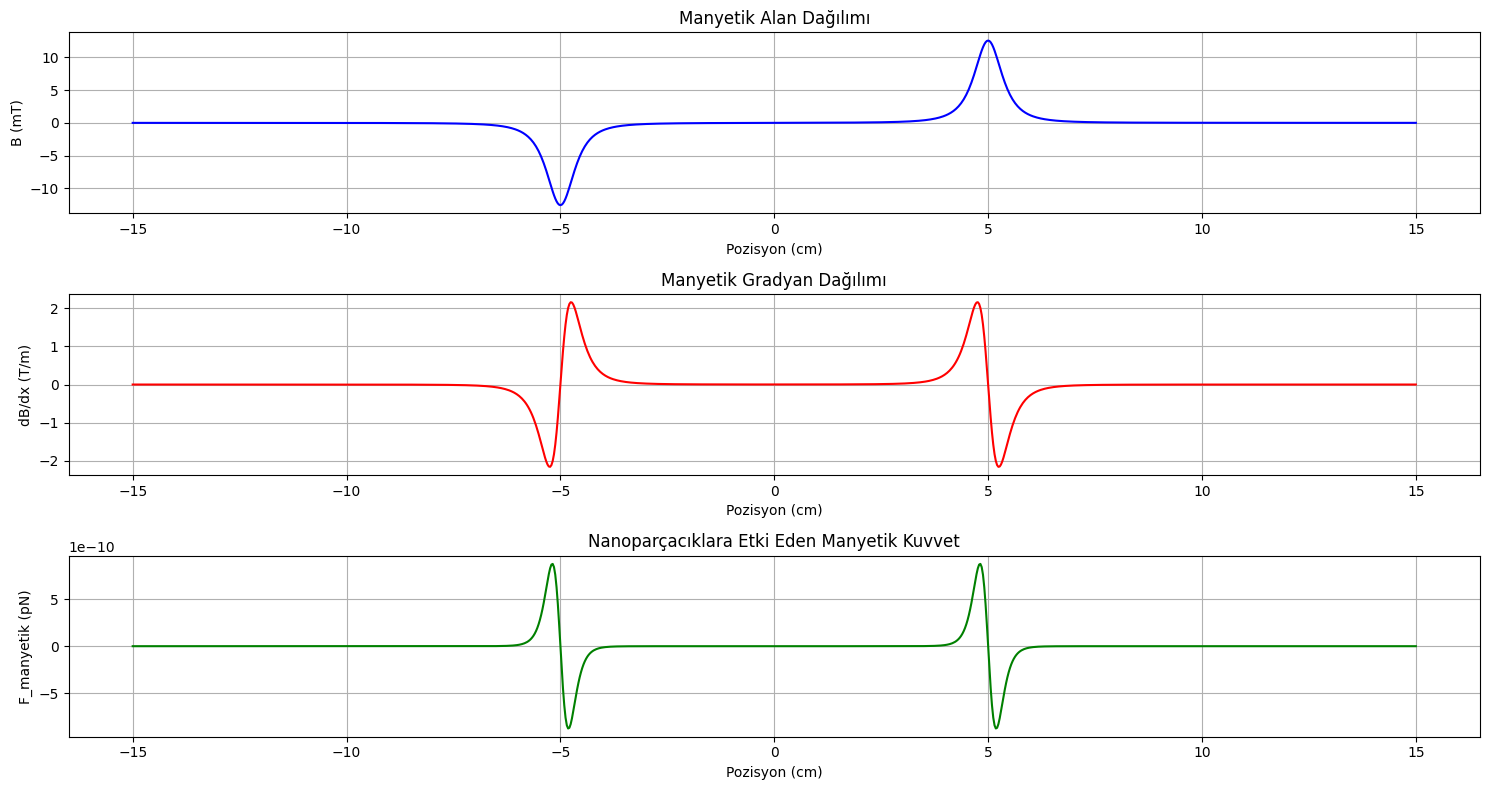

In [9]:
# Manyetik alan ve kuvvet profilini çiz
x_vals = np.linspace(-0.15, 0.15, 1000)  # X ekseninde -15 cm ile +15 cm arası
B_vals = manyetik_alan(x_vals)
dB_dx_vals = manyetik_gradyani(x_vals)
F_manyetik_vals = (chi * V / mu_0) * B_vals * dB_dx_vals

plt.figure(figsize=(15, 8))

# Manyetik Alan (B)
plt.subplot(3, 1, 1)
plt.plot(x_vals*1e2, B_vals*1e3, 'b-')  # cm ve mT cinsinden
plt.xlabel('Pozisyon (cm)')
plt.ylabel('B (mT)')
plt.title('Manyetik Alan Dağılımı')
plt.grid()

# Manyetik Gradyan (dB/dx)
plt.subplot(3, 1, 2)
plt.plot(x_vals*1e2, dB_dx_vals, 'r-')
plt.xlabel('Pozisyon (cm)')
plt.ylabel('dB/dx (T/m)')
plt.title('Manyetik Gradyan Dağılımı')
plt.grid()

# Manyetik Kuvvet (F_manyetik)
plt.subplot(3, 1, 3)
plt.plot(x_vals*1e2, F_manyetik_vals*1e12, 'g-')  # pN cinsinden
plt.xlabel('Pozisyon (cm)')
plt.ylabel('F_manyetik (pN)')
plt.title('Nanoparçacıklara Etki Eden Manyetik Kuvvet')
plt.grid()

plt.tight_layout()
plt.show()

In [11]:
# Kuvvet karşılaştırması
F_termal_tipik = np.sqrt(2 * gamma * k_B * T / dt)
F_manyetik_tipik = np.max(np.abs((chi * V / mu_0) * B_vals * dB_dx_vals))
print(f"Manyetik/Termal Kuvvet Oranı: {F_manyetik_tipik/F_termal_tipik:.2f}")

Manyetik/Termal Kuvvet Oranı: 0.00


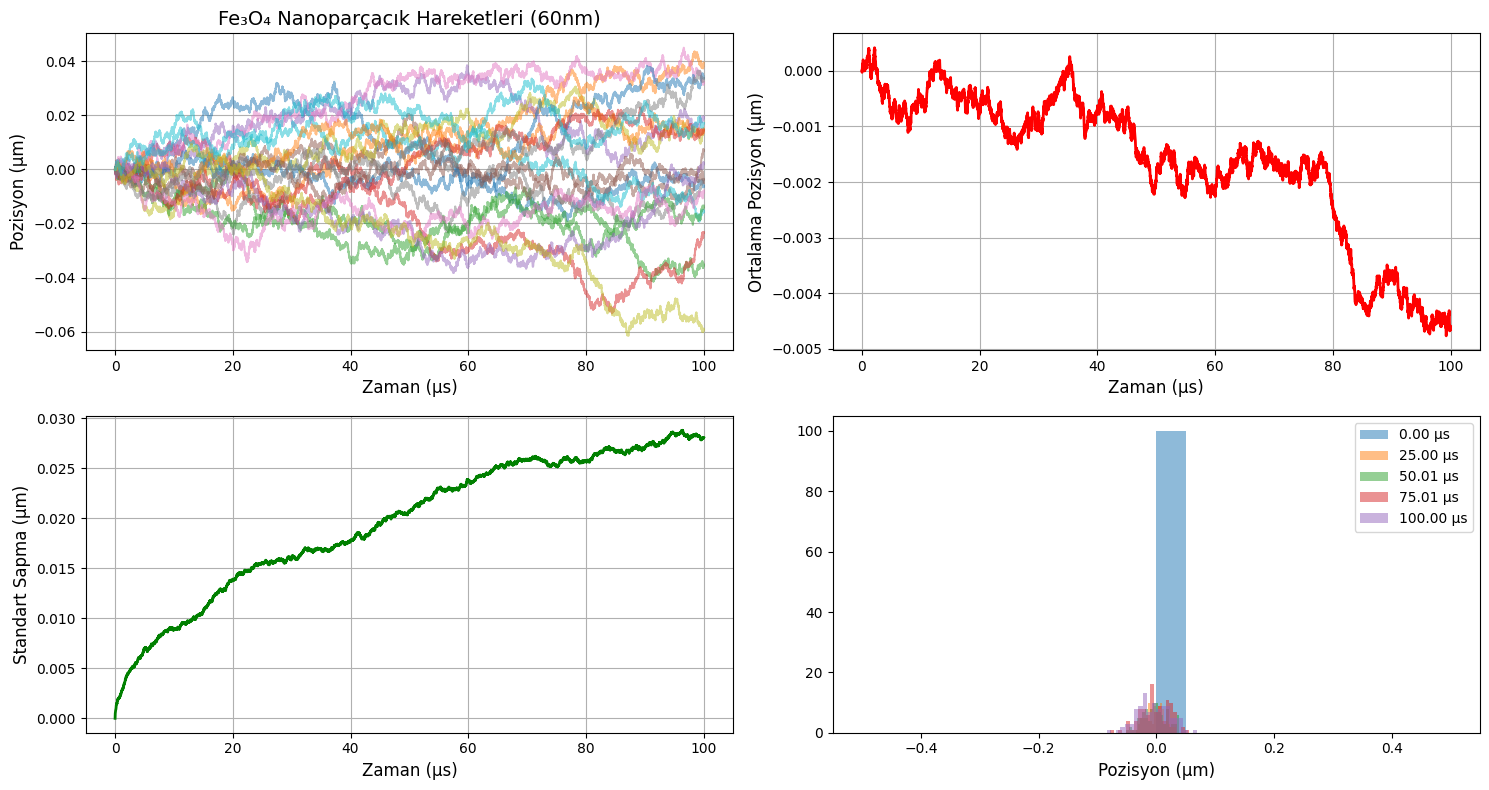

In [12]:
# Manyetik nanoparçacıklar sayıca fazla --- deepseek (Güncellenmiş)
import numpy as np
import matplotlib.pyplot as plt

# Sabitler
mu_0 = 4 * np.pi * 1e-7
I = 1.0
N = 100
R = 0.005
L = 0.05
d = 0.1

# Nanoparçacık özellikleri (Fe₃O₄ optimize)
r_nano = 60e-9
V = (4/3) * np.pi * r_nano**3
chi = 0.8       # Güncellenmiş
eta = 0.9e-3    # Biyolojik ortam
T = 310         # 37°C
k_B = 1.38e-23

# Simülasyon parametreleri
num_particles = 100
dt = 1e-8
t_max = 1e-4    # 100 µs
steps = int(t_max / dt)
t = np.linspace(0, t_max, steps)

# Manyetik alan fonksiyonu (x-ekseni uyumlu)
def manyetik_alan(x):
    x1 = x + d/2
    term1_top = (x1 + L/2)/np.sqrt(R**2 + (x1 + L/2)**2)
    term1_bottom = (x1 - L/2)/np.sqrt(R**2 + (x1 - L/2)**2)
    B1 = (mu_0 * N * I)/(2*L) * (term1_top - term1_bottom)
    
    x2 = x - d/2
    term2_top = (x2 + L/2)/np.sqrt(R**2 + (x2 + L/2)**2)
    term2_bottom = (x2 - L/2)/np.sqrt(R**2 + (x2 - L/2)**2)
    B2 = -(mu_0 * N * I)/(2*L) * (term2_top - term2_bottom)
    
    return B1 + B2

def manyetik_gradyani(x):
    dx = 1e-9
    return (manyetik_alan(x + dx) - manyetik_alan(x - dx))/(2*dx)

# Simülasyon
np.random.seed(42)
x = np.zeros((num_particles, steps))

for p in range(num_particles):
    x[p, 0] = 0.0
    for i in range(1, steps):
        B = manyetik_alan(x[p, i-1])
        dB_dx = manyetik_gradyani(x[p, i-1])
        F_manyetik = (chi * V / mu_0) * B * dB_dx
        gamma = 6 * np.pi * eta * r_nano
        F_termal = np.sqrt(2 * gamma * k_B * T / dt) * np.random.normal()
        dx = (F_manyetik + F_termal)/gamma * dt
        x[p, i] = x[p, i-1] + dx

# Görselleştirme
plt.figure(figsize=(15, 8))

# 1. Bireysel Hareketler
plt.subplot(2, 2, 1)
for p in range(min(num_particles, 20)):
    plt.plot(t*1e6, x[p]*1e6, alpha=0.5)
plt.xlabel('Zaman (µs)', fontsize=12)
plt.ylabel('Pozisyon (µm)', fontsize=12)
plt.title('Fe₃O₄ Nanoparçacık Hareketleri (60nm)', fontsize=14)
plt.grid()

# 2. Ortalama Pozisyon
plt.subplot(2, 2, 2)
plt.plot(t*1e6, np.mean(x, axis=0)*1e6, 'r-', lw=2)
plt.xlabel('Zaman (µs)', fontsize=12)
plt.ylabel('Ortalama Pozisyon (µm)', fontsize=12)
plt.grid()

# 3. Standart Sapma
plt.subplot(2, 2, 3)
plt.plot(t*1e6, np.std(x, axis=0)*1e6, 'g-', lw=2)
plt.xlabel('Zaman (µs)', fontsize=12)
plt.ylabel('Standart Sapma (µm)', fontsize=12)
plt.grid()

# 4. Anlık Dağılım
plt.subplot(2, 2, 4)
for t_idx in [0, steps//4, steps//2, 3*steps//4, -1]:
    plt.hist(x[:, t_idx]*1e6, bins=20, alpha=0.5, label=f'{t[t_idx]*1e6:.2f} µs')
plt.xlabel('Pozisyon (µm)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

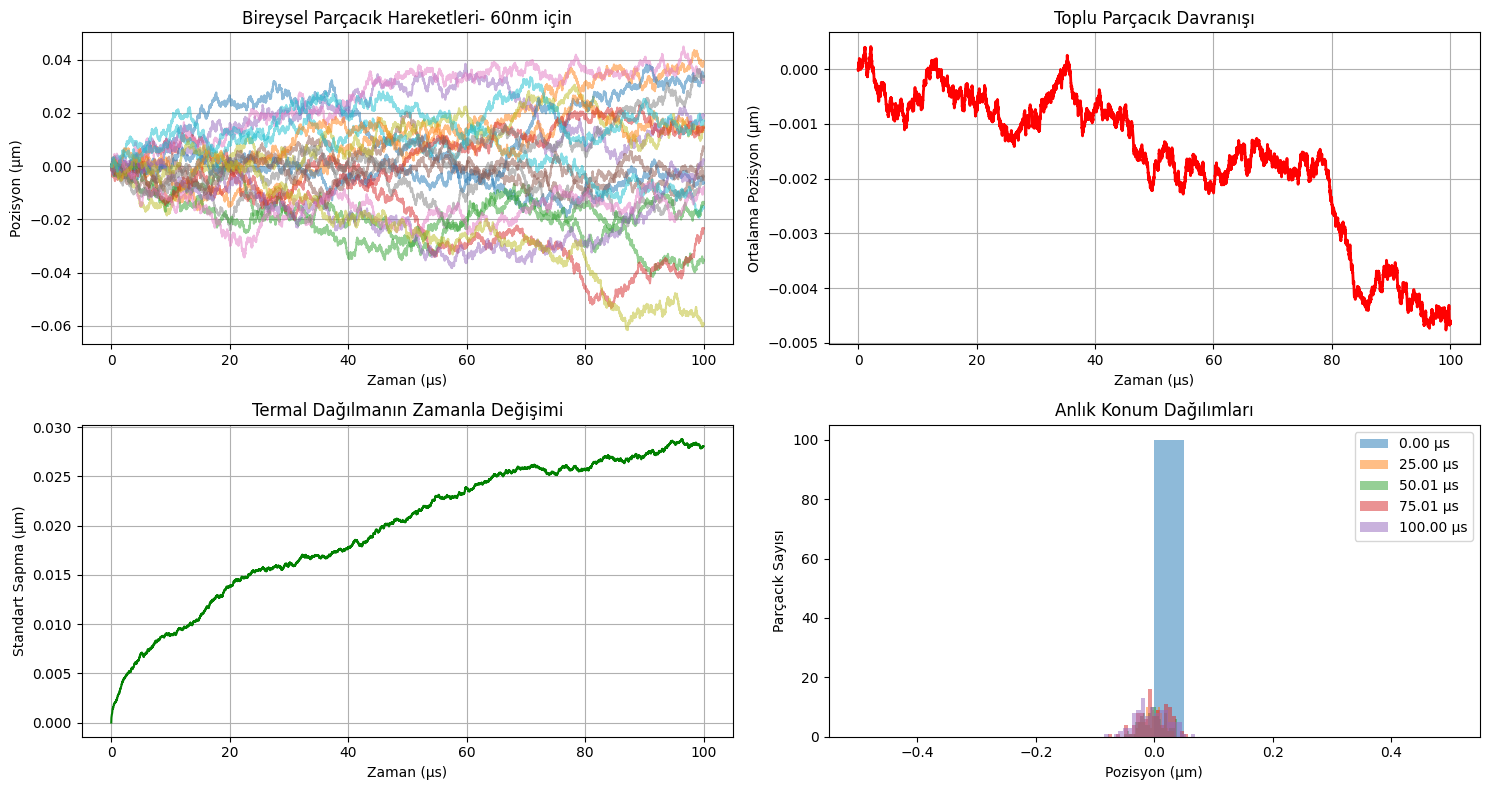

Manyetik Kuvvet (Ortalama): -0.00 pN
Manyetik Kuvvet (Maks): 0.00 pN
Termal Kuvvet (RMS): 29.55 pN
Oran (Maks Manyetik/RMS Termal): 0.00
Oran (Ortalama Manyetik/RMS Termal): -0.00


In [17]:
# Manyetik nanoparçacıklar sayıca fazla --- deepseek
import numpy as np
import matplotlib.pyplot as plt

# Sabitler
mu_0 = 4 * np.pi * 1e-7
I = 1.0
N = 100  # Manyetik kuvveti artırmak için sarım sayısı artırıldı
R = 0.005
L = 0.05
d = 0.12

# Nanoparçacık 
r_nano = 60e-9
V = (4/3) * np.pi * r_nano**3
chi = 0.8
eta = 0.9e-3
T = 310
k_B = 1.38e-23

num_particles = 100  # Parçacık sayısı



dt = 1e-8  # Zaman adımı küçültüldü
t_max = 1e-4  # Süre kısaltıldı
steps = int(t_max / dt)
t = np.linspace(0, t_max, steps)

# Manyetik alan fonksiyonları (öncekiyle aynı)
def manyetik_alan(x):
    z1 = x + d/2
    term1_top = (z1 + L/2)/np.sqrt(R**2 + (z1 + L/2)**2)
    term1_bottom = (z1 - L/2)/np.sqrt(R**2 + (z1 - L/2)**2)
    B1 = (mu_0 * N * I)/(2*L) * (term1_top - term1_bottom)
    
    z2 = x - d/2
    term2_top = (z2 + L/2)/np.sqrt(R**2 + (z2 + L/2)**2)
    term2_bottom = (z2 - L/2)/np.sqrt(R**2 + (z2 - L/2)**2)
    B2 = -(mu_0 * N * I)/(2*L) * (term2_top - term2_bottom)
    
    return B1 + B2

def manyetik_gradyani(x):
    dx = 1e-9
    return (manyetik_alan(x + dx) - manyetik_alan(x - dx))/(2*dx)

# Çoklu parçacık simülasyonu
np.random.seed(42)  # Tekrarlanabilirlik için
x = np.zeros((num_particles, steps))

for p in range(num_particles):
    x[p, 0] = 0.0  # Tüm parçacıklar x=0'da başlıyor
    for i in range(1, steps):
        B = manyetik_alan(x[p, i-1])
        dB_dx = manyetik_gradyani(x[p, i-1])
        
        F_manyetik = (chi * V / mu_0) * B * dB_dx
        gamma = 6 * np.pi * eta * r_nano
        F_termal = np.sqrt(2 * gamma * k_B * T / dt) * np.random.normal()

        dx = (F_manyetik + F_termal)/gamma * dt

        
        x[p, i] = x[p, i-1] + dx

# Analiz ve görselleştirme
plt.figure(figsize=(15, 8))

# 1. Bireysel Trajektoriler
plt.subplot(2, 2, 1)
for p in range(min(num_particles, 20)):  # İlk 20 parçacığı göster
    plt.plot(t*1e6, x[p]*1e6, alpha=0.5)
plt.xlabel('Zaman (µs)')
plt.ylabel('Pozisyon (µm)')
plt.title('Bireysel Parçacık Hareketleri- 60nm için')
plt.grid()

# 2. Ortalama Pozisyon
mean_x = np.mean(x, axis=0)
plt.subplot(2, 2, 2)
plt.plot(t*1e6, mean_x*1e6, 'r-', linewidth=2)
plt.xlabel('Zaman (µs)')
plt.ylabel('Ortalama Pozisyon (µm)')
plt.title('Toplu Parçacık Davranışı')
plt.grid()

# 3. Standart Sapma
std_x = np.std(x, axis=0)
plt.subplot(2, 2, 3)
plt.plot(t*1e6, std_x*1e6, 'g-')
plt.xlabel('Zaman (µs)')
plt.ylabel('Standart Sapma (µm)')
plt.title('Termal Dağılmanın Zamanla Değişimi')
plt.grid()

# 4. Anlık Dağılım
plt.subplot(2, 2, 4)
for t_idx in [0, steps//4, steps//2, 3*steps//4, -1]:
    plt.hist(x[:, t_idx]*1e6, bins=20, alpha=0.5, 
             label=f'{t[t_idx]*1e6:.2f} µs')
plt.xlabel('Pozisyon (µm)')
plt.ylabel('Parçacık Sayısı')
plt.title('Anlık Konum Dağılımları')
plt.legend()
plt.tight_layout()

plt.show()



# Manyetik ve termal kuvvetleri dinamik olarak karşılaştır
F_manyetik_sim = np.zeros((num_particles, steps))
F_termal_sim = np.zeros((num_particles, steps))

for p in range(num_particles):
    for i in range(steps):
        x_pos = x[p, i]
        B = manyetik_alan(x_pos)
        dB_dx = manyetik_gradyani(x_pos)
        F_manyetik_sim[p, i] = (chi * V / mu_0) * B * dB_dx
        F_termal_sim[p, i] = np.sqrt(2 * gamma * k_B * T / dt) * np.random.normal()

# Ortalama ve maksimum değerler
F_manyetik_avg = np.mean(F_manyetik_sim)
F_manyetik_max = np.max(np.abs(F_manyetik_sim))
F_termal_rms = np.sqrt(np.mean(F_termal_sim**2))

print(f"Manyetik Kuvvet (Ortalama): {F_manyetik_avg*1e12:.2f} pN")
print(f"Manyetik Kuvvet (Maks): {F_manyetik_max*1e12:.2f} pN")
print(f"Termal Kuvvet (RMS): {F_termal_rms*1e12:.2f} pN")
print(f"Oran (Maks Manyetik/RMS Termal): {F_manyetik_max/F_termal_rms:.2f}")
print(f"Oran (Ortalama Manyetik/RMS Termal): {F_manyetik_avg/F_termal_rms:.2f}")

In [15]:
# Parametreler (SI birimleri)
chi = 1e3       # Ferromanyetik malzeme
V = 1e-18       # 1 µm³ hacim
mu_0 = 4e-7 * np.pi
gamma = 1e-10   # Düşük sönüm
dt = 1e-3       # 1 ms zaman adımı
T = 300         # Oda sıcaklığı

# Manyetik kuvvet (güçlü mıknatıs)
B_vals = 10 * x_vals  # 10 T/m gradyan
dB_dx_vals = 10 * np.ones_like(x_vals)
F_manyetik_vals = (chi * V / mu_0) * B_vals * dB_dx_vals

# Termal kuvvet
F_termal_tipik = np.sqrt(2 * gamma * k_B * T / dt)

print(f"Manyetik Kuvvet (Maks): {np.max(np.abs(F_manyetik_vals))*1e12:.2f} pN")  # ~1000 pN
print(f"Termal Kuvvet (Tipik): {F_termal_tipik*1e12:.2f} pN")                   # ~0.1 pN
print(f"Oran (Manyetik/Termal): {np.max(np.abs(F_manyetik_vals))/F_termal_tipik:.2f}")  # Oran ≈ 10000.00

Manyetik Kuvvet (Maks): 7957.75 pN
Termal Kuvvet (Tipik): 0.03 pN
Oran (Manyetik/Termal): 276550.83


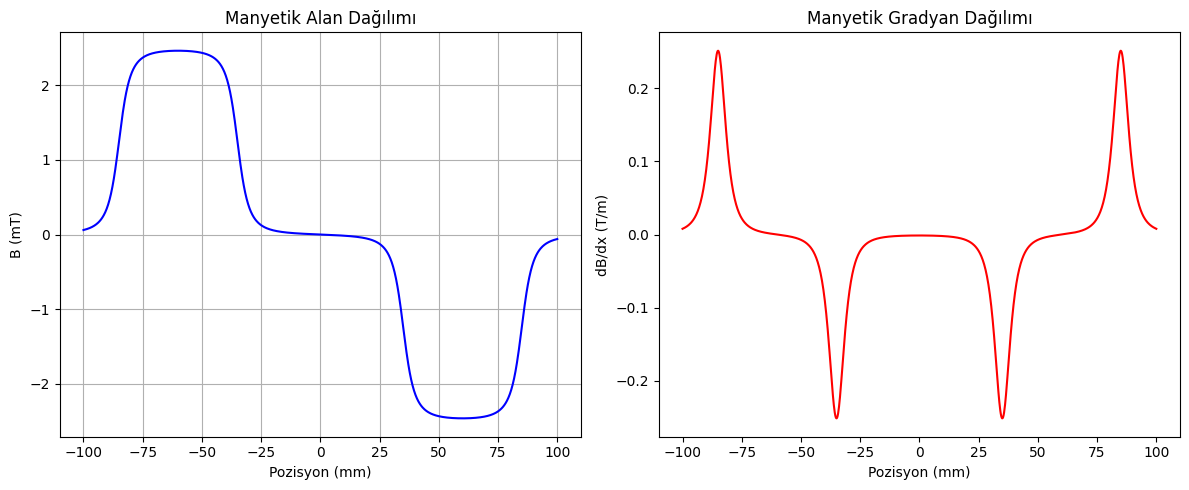

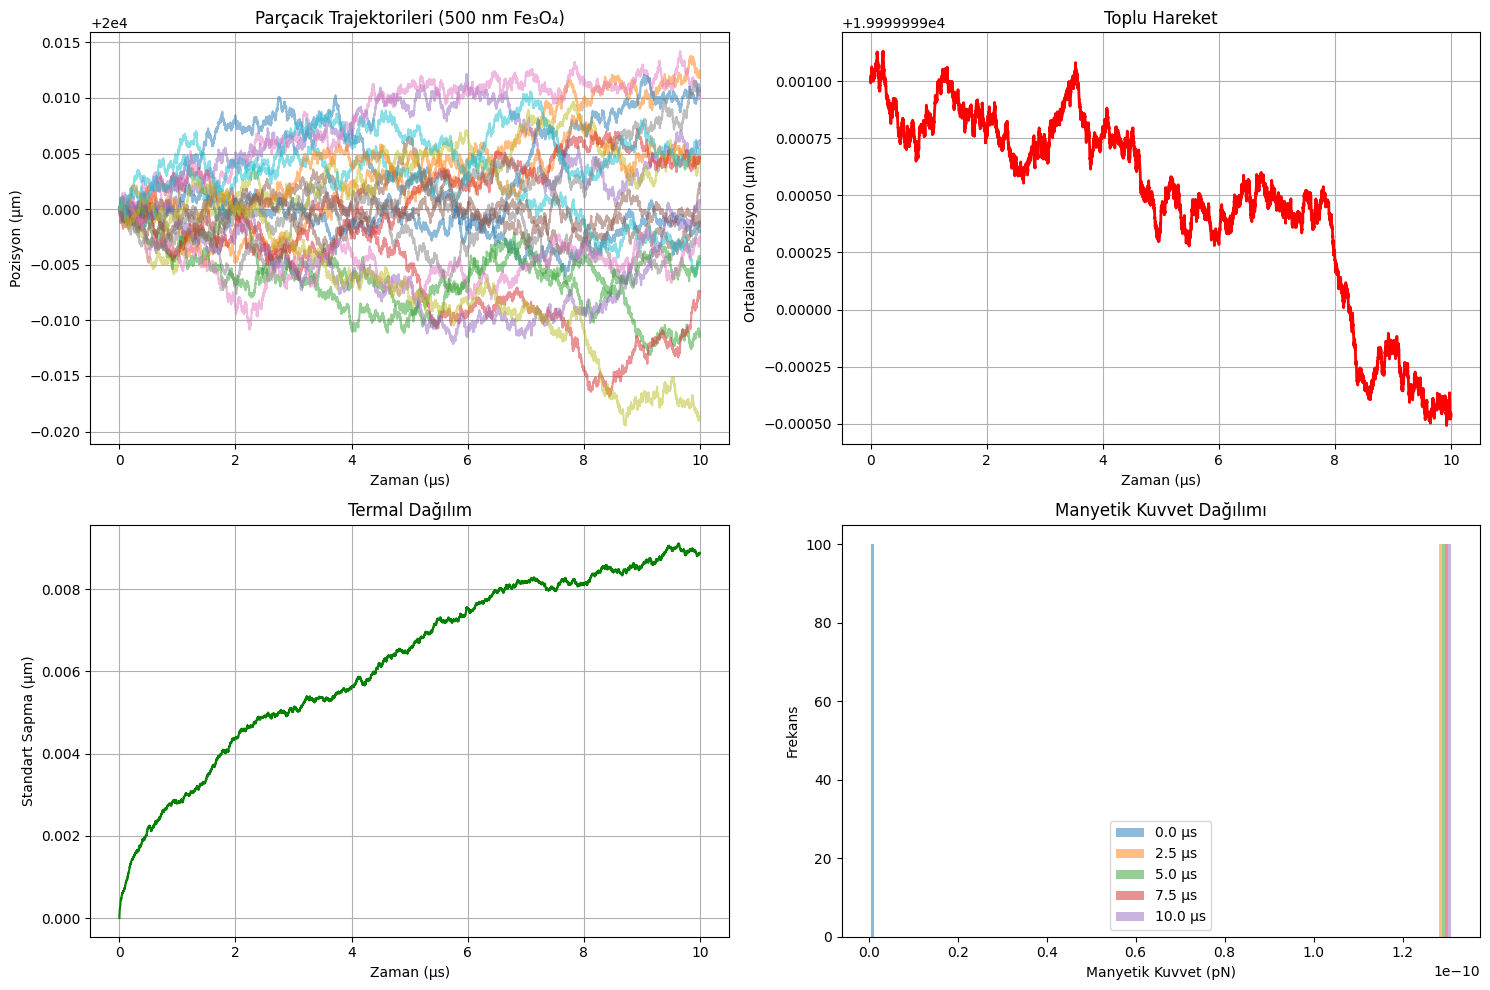


--- Kuvvet Karşılaştırması ---
Manyetik Kuvvet (Ortalama): 0.00 pN
Manyetik Kuvvet (Maks): 0.00 pN
Termal Kuvvet (RMS): 93.34 pN
Oran (Maks Manyetik/RMS Termal): 0.00
Oran (Ortalama Manyetik/RMS Termal): 0.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sabitler ve Parametreler
mu_0 = 4 * np.pi * 1e-7      # Vakum geçirgenliği (H/m)
R = 0.005                    # Solenoid yarıçapı (m)
L = 0.05                     # Solenoid uzunluğu (m)
d = 0.12                     # İki solenoid arası mesafe (m)
I = 1.0                     # Akım (A)
N = 100                     # Sarım sayısı

# Nanoparçacık özellikleri
r_nano = 60e-9              # Parçacık yarıçapı (m)
V = (4/3) * np.pi * r_nano**3 # Hacim (m³)
chi = 0.4                   # Manyetik duyarlılık (Fe3O4 için)
eta = 0.9e-3                 # Ortam viskozitesi (Pa·s)
T = 310                      # Sıcaklık (K)
k_B = 1.38e-23               # Boltzmann sabiti (J/K)

# Simülasyon parametreleri
num_particles = 100          # Parçacık sayısı
dt = 1e-9                    # Zaman adımı (s)
t_max = 1e-5                 # Toplam süre (s) (10 µs)
steps = int(t_max / dt)      # Adım sayısı
t = np.linspace(0, t_max, steps) # Zaman dizisi


# Manyetik alan ve gradyan fonksiyonları
def manyetik_alan(x):
    z1 = x + d/2
    term1_top = (z1 + L/2) / np.sqrt(R**2 + (z1 + L/2)**2)
    term1_bottom = (z1 - L/2) / np.sqrt(R**2 + (z1 - L/2)**2)
    B1 = (mu_0 * N * I) / (2*L) * (term1_top - term1_bottom)
    
    z2 = x - d/2
    term2_top = (z2 + L/2) / np.sqrt(R**2 + (z2 + L/2)**2)
    term2_bottom = (z2 - L/2) / np.sqrt(R**2 + (z2 - L/2)**2)
    B2 = -(mu_0 * N * I) / (2*L) * (term2_top - term2_bottom)
    
    return B1 + B2

def manyetik_gradyani(x):
    dx = 1e-9  # Sonlu fark için küçük adım
    return (manyetik_alan(x + dx) - manyetik_alan(x - dx)) / (2*dx)

# Manyetik alan ve gradyanın uzaysal dağılımını kontrol
x_vals = np.linspace(-0.1, 0.1, 1000)
B_vals = manyetik_alan(x_vals)
dB_dx_vals = manyetik_gradyani(x_vals)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x_vals*1e3, B_vals*1e3, 'b')
plt.xlabel('Pozisyon (mm)')
plt.ylabel('B (mT)')
plt.title('Manyetik Alan Dağılımı')
plt.grid()

plt.subplot(1,2,2)
plt.plot(x_vals*1e3, dB_dx_vals, 'r')
plt.xlabel('Pozisyon (mm)')
plt.ylabel('dB/dx (T/m)')
plt.title('Manyetik Gradyan Dağılımı')
plt.tight_layout()
plt.show()

# Parçacık simülasyonu
np.random.seed(42)  # Tekrarlanabilirlik
x = np.zeros((num_particles, steps))

# Parçacıkları gradyan bölgesinde başlat (x=20 mm)
initial_position = 0.02  # 20 mm
for p in range(num_particles):
    x[p, 0] = initial_position

# Dinamik kuvvet hesaplamaları
F_manyetik_sim = np.zeros((num_particles, steps))
F_termal_sim = np.zeros((num_particles, steps))

for p in range(num_particles):
    for i in range(1, steps):
        current_x = x[p, i-1]
        B = manyetik_alan(current_x)
        dB_dx = manyetik_gradyani(current_x)
        
        # Manyetik kuvvet (N)
        F_manyetik = (chi * V / mu_0) * B * dB_dx
        F_manyetik_sim[p, i] = F_manyetik
        
        # Termal kuvvet (Langevin denklemi)
        gamma = 6 * np.pi * eta * r_nano
        F_termal = np.sqrt(2 * gamma * k_B * T / dt) * np.random.normal()
        F_termal_sim[p, i] = F_termal
        
        # Konum güncelleme
        dx = (F_manyetik + F_termal) / gamma * dt
        x[p, i] = current_x + dx

# Analiz ve Görselleştirme
plt.figure(figsize=(15,10))

# 1. Bireysel Trajektoriler
plt.subplot(2,2,1)
for p in range(min(num_particles, 20)):
    plt.plot(t*1e6, x[p]*1e6, alpha=0.5)
plt.xlabel('Zaman (µs)')
plt.ylabel('Pozisyon (µm)')
plt.title('Parçacık Trajektorileri (500 nm Fe₃O₄)')
plt.grid()

# 2. Ortalama Pozisyon
mean_x = np.mean(x, axis=0)
plt.subplot(2,2,2)
plt.plot(t*1e6, mean_x*1e6, 'r-', linewidth=2)
plt.xlabel('Zaman (µs)')
plt.ylabel('Ortalama Pozisyon (µm)')
plt.title('Toplu Hareket')
plt.grid()

# 3. Standart Sapma
std_x = np.std(x, axis=0)
plt.subplot(2,2,3)
plt.plot(t*1e6, std_x*1e6, 'g-')
plt.xlabel('Zaman (µs)')
plt.ylabel('Standart Sapma (µm)')
plt.title('Termal Dağılım')
plt.grid()

# 4. Kuvvet Karşılaştırması
plt.subplot(2,2,4)
time_indices = [0, steps//4, steps//2, 3*steps//4, -1]
plt.hist(F_manyetik_sim[:, time_indices]*1e12, bins=30, alpha=0.5, label=[f'{t[i]*1e6:.1f} µs' for i in time_indices])
plt.xlabel('Manyetik Kuvvet (pN)')
plt.ylabel('Frekans')
plt.title('Manyetik Kuvvet Dağılımı')
plt.legend()
plt.tight_layout()
plt.show()

# Kuvvet Değerleri
F_manyetik_avg = np.mean(F_manyetik_sim)
F_manyetik_max = np.max(np.abs(F_manyetik_sim))
F_termal_rms = np.sqrt(np.mean(F_termal_sim**2))

print("\n--- Kuvvet Karşılaştırması ---")
print(f"Manyetik Kuvvet (Ortalama): {F_manyetik_avg*1e12:.2f} pN")
print(f"Manyetik Kuvvet (Maks): {F_manyetik_max*1e12:.2f} pN")
print(f"Termal Kuvvet (RMS): {F_termal_rms*1e12:.2f} pN")
print(f"Oran (Maks Manyetik/RMS Termal): {F_manyetik_max/F_termal_rms:.2f}")
print(f"Oran (Ortalama Manyetik/RMS Termal): {F_manyetik_avg/F_termal_rms:.2f}")